In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import random
from collections import Counter
import scipy.stats as stats

What has been done so far:
- Filtered the orginal data into the first season of survivor
- Then for each tribal ("stage of game" or sog_id) I grouped the players that voted together into a list of vectors
- To transport that list into python I had to include 'NA'(s)
- The code below is removing those 'NA'(s)
- Now we have the voting groups of each round for season one of US Survivor

In [793]:
s1_voting_groups = np.loadtxt("s1_voting_groups.txt", dtype= 'str').tolist()
s2_voting_groups = np.loadtxt("s2_voting_groups.txt", dtype= 'str').tolist()
s3_voting_groups = np.loadtxt("s3_voting_groups.txt", dtype= 'str').tolist()
s4_voting_groups = np.loadtxt("s4_voting_groups.txt", dtype= 'str').tolist()
s5_voting_groups = np.loadtxt("s5_voting_groups.txt", dtype= 'str').tolist()
s6_voting_groups = np.loadtxt("s6_voting_groups.txt", dtype= 'str').tolist()
s7_voting_groups = np.loadtxt("s7_voting_groups.txt", dtype= 'str').tolist()
s8_voting_groups = np.loadtxt("s8_voting_groups.txt", dtype= 'str').tolist()
s9_voting_groups = np.loadtxt("s9_voting_groups.txt", dtype= 'str').tolist()
s10_voting_groups = np.loadtxt("s10_voting_groups.txt", dtype= 'str').tolist()

s1_gender = np.loadtxt("s1_gender.txt", dtype= 'str').tolist()
s2_gender = np.loadtxt("s2_gender.txt", dtype= 'str').tolist()
s3_gender = np.loadtxt("s3_gender.txt", dtype= 'str').tolist()
s4_gender = np.loadtxt("s4_gender.txt", dtype= 'str').tolist()
s5_gender = np.loadtxt("s5_gender.txt", dtype= 'str').tolist()
s6_gender = np.loadtxt("s6_gender.txt", dtype= 'str').tolist()
s7_gender = np.loadtxt("s7_gender.txt", dtype= 'str').tolist()
s8_gender = np.loadtxt("s8_gender.txt", dtype= 'str').tolist()
s9_gender = np.loadtxt("s9_gender.txt", dtype= 'str').tolist()
s10_gender = np.loadtxt("s10_gender.txt", dtype= 'str').tolist()

s1_race = np.loadtxt("s1_race.txt", dtype= 'str').tolist()
s2_race = np.loadtxt("s2_race.txt", dtype= 'str').tolist()
s3_race = np.loadtxt("s3_race.txt", dtype= 'str').tolist()
s4_race = np.loadtxt("s4_race.txt", dtype= 'str').tolist()
s5_race = np.loadtxt("s5_race.txt", dtype= 'str').tolist()
s6_race = np.loadtxt("s6_race.txt", dtype= 'str').tolist()
s7_race = np.loadtxt("s7_race.txt", dtype= 'str').tolist()
s8_race = np.loadtxt("s8_race.txt", dtype= 'str').tolist()
s9_race = np.loadtxt("s9_race.txt", dtype= 'str').tolist()
s10_race = np.loadtxt("s10_race.txt", dtype= 'str').tolist()



In [895]:
s1_place = np.loadtxt("s1_place.txt", dtype= 'str').tolist()
s2_place = np.loadtxt("s2_place.txt", dtype= 'str').tolist()
s3_place = np.loadtxt("s3_place.txt", dtype= 'str').tolist()
s4_place = np.loadtxt("s4_place.txt", dtype= 'str').tolist()
s5_place = np.loadtxt("s5_place.txt", dtype= 'str').tolist()
s6_place = np.loadtxt("s6_place.txt", dtype= 'str').tolist()
s7_place = np.loadtxt("s7_place.txt", dtype= 'str').tolist()
s8_place = np.loadtxt("s8_place.txt", dtype= 'str').tolist()
s9_place = np.loadtxt("s9_place.txt", dtype= 'str').tolist()
s10_place = np.loadtxt("s10_place.txt", dtype= 'str').tolist()

s11_place = np.loadtxt("s11_place.txt", dtype= 'str').tolist()
s12_place = np.loadtxt("s12_place.txt", dtype= 'str').tolist()
s13_place = np.loadtxt("s13_place.txt", dtype= 'str').tolist()
s14_place = np.loadtxt("s14_place.txt", dtype= 'str').tolist()
s15_place = np.loadtxt("s15_place.txt", dtype= 'str').tolist()
s16_place = np.loadtxt("s16_place.txt", dtype= 'str').tolist()
s17_place = np.loadtxt("s17_place.txt", dtype= 'str').tolist()
s18_place = np.loadtxt("s18_place.txt", dtype= 'str').tolist()
s19_place = np.loadtxt("s19_place.txt", dtype= 'str').tolist()
s20_place = np.loadtxt("s20_place.txt", dtype= 'str').tolist()

s21_place = np.loadtxt("s21_place.txt", dtype= 'str').tolist()
s22_place = np.loadtxt("s22_place.txt", dtype= 'str').tolist()
s23_place = np.loadtxt("s23_place.txt", dtype= 'str').tolist()
s24_place = np.loadtxt("s24_place.txt", dtype= 'str').tolist()
s25_place = np.loadtxt("s25_place.txt", dtype= 'str').tolist()
s26_place = np.loadtxt("s26_place.txt", dtype= 'str').tolist()
s27_place = np.loadtxt("s27_place.txt", dtype= 'str').tolist()
s28_place = np.loadtxt("s28_place.txt", dtype= 'str').tolist()
s29_place = np.loadtxt("s29_place.txt", dtype= 'str').tolist()
s30_place = np.loadtxt("s30_place.txt", dtype= 'str').tolist()

s31_place = np.loadtxt("s31_place.txt", dtype= 'str').tolist()
s32_place = np.loadtxt("s32_place.txt", dtype= 'str').tolist()
s33_place = np.loadtxt("s33_place.txt", dtype= 'str').tolist()
s34_place = np.loadtxt("s34_place.txt", dtype= 'str').tolist()
s35_place = np.loadtxt("s35_place.txt", dtype= 'str').tolist()
s36_place = np.loadtxt("s36_place.txt", dtype= 'str').tolist()
s37_place = np.loadtxt("s37_place.txt", dtype= 'str').tolist()
s38_place = np.loadtxt("s38_place.txt", dtype= 'str').tolist()
s39_place = np.loadtxt("s39_place.txt", dtype= 'str').tolist()
s40_place = np.loadtxt("s40_place.txt", dtype= 'str').tolist()

In [896]:
for y in range(0, len(s1_voting_groups)):
    s1_voting_groups[y] = [x for x in s1_voting_groups[y] if str(x) != 'NA']
    s1_gender[y] = [x for x in s1_gender[y] if str(x) != 'NA']
    s1_race[y] = [x for x in s1_race[y] if str(x) != 'NA']
    s1_place[y] = [x for x in s1_place[y] if str(x) != 'NA']

for y in range(0, len(s2_voting_groups)):
    s2_voting_groups[y] = [x for x in s2_voting_groups[y] if str(x) != 'NA']
    s2_gender[y] = [x for x in s2_gender[y] if str(x) != 'NA']
    s2_race[y] = [x for x in s2_race[y] if str(x) != 'NA']
    s2_place[y] = [x for x in s2_place[y] if str(x) != 'NA']

for y in range(0, len(s3_voting_groups)):
    s3_voting_groups[y] = [x for x in s3_voting_groups[y] if str(x) != 'NA']
    s3_gender[y] = [x for x in s3_gender[y] if str(x) != 'NA']
    s3_race[y] = [x for x in s3_race[y] if str(x) != 'NA']
    s3_place[y] = [x for x in s3_place[y] if str(x) != 'NA']

for y in range(0, len(s4_voting_groups)):
    s4_voting_groups[y] = [x for x in s4_voting_groups[y] if str(x) != 'NA']
    s4_gender[y] = [x for x in s4_gender[y] if str(x) != 'NA']
    s4_race[y] = [x for x in s4_race[y] if str(x) != 'NA']
    s4_place[y] = [x for x in s4_place[y] if str(x) != 'NA']   

for y in range(0, len(s5_voting_groups)):
    s5_voting_groups[y] = [x for x in s5_voting_groups[y] if str(x) != 'NA']
    s5_gender[y] = [x for x in s5_gender[y] if str(x) != 'NA']
    s5_race[y] = [x for x in s5_race[y] if str(x) != 'NA']
    s5_place[y] = [x for x in s5_place[y] if str(x) != 'NA']   

for y in range(0, len(s6_voting_groups)):
    s6_voting_groups[y] = [x for x in s6_voting_groups[y] if str(x) != 'NA']
    s6_gender[y] = [x for x in s6_gender[y] if str(x) != 'NA']
    s6_race[y] = [x for x in s6_race[y] if str(x) != 'NA']
    s6_place[y] = [x for x in s6_place[y] if str(x) != 'NA']

for y in range(0, len(s7_voting_groups)):
    s7_voting_groups[y] = [x for x in s7_voting_groups[y] if str(x) != 'NA']
    s7_gender[y] = [x for x in s7_gender[y] if str(x) != 'NA']
    s7_race[y] = [x for x in s7_race[y] if str(x) != 'NA']  
    s7_place[y] = [x for x in s7_place[y] if str(x) != 'NA']

for y in range(0, len(s8_voting_groups)):
    s8_voting_groups[y] = [x for x in s8_voting_groups[y] if str(x) != 'NA']
    s8_gender[y] = [x for x in s8_gender[y] if str(x) != 'NA']
    s8_race[y] = [x for x in s8_race[y] if str(x) != 'NA']
    s8_place[y] = [x for x in s8_place[y] if str(x) != 'NA']  

for y in range(0, len(s9_voting_groups)):
    s9_voting_groups[y] = [x for x in s9_voting_groups[y] if str(x) != 'NA']
    s9_gender[y] = [x for x in s9_gender[y] if str(x) != 'NA']
    s9_race[y] = [x for x in s9_race[y] if str(x) != 'NA']
    s9_place[y] = [x for x in s9_place[y] if str(x) != 'NA']  

for y in range(0, len(s10_voting_groups)):
    s10_voting_groups[y] = [x for x in s10_voting_groups[y] if str(x) != 'NA']
    s10_gender[y] = [x for x in s10_gender[y] if str(x) != 'NA']
    s10_race[y] = [x for x in s10_race[y] if str(x) != 'NA']
    s10_place[y] = [x for x in s10_place[y] if str(x) != 'NA']         

Don't know if the below code can be optimized. Currently, manually changing the s'x'_voting_group variable by hand. Kinda sucks.

Association rule is an implication expression of the form X $\leftarrow$ Y, where X and Y are disjoint itemsets.

The support metric is defined for itemsets, not association rules. It is defined as support(A $\rightarrow$ C) = support(A $\cup$ C), range:[0, 1]

The table produced by the association rule mining algorithm contains three different support metrics: 'antecedent support', 'consequent support', and 'support'.

- 'Antecedent Support': The proportion of transactions that contain the antecedent A
    - The percentage of tribals where A voted

- 'Consequent Support': The support for the itemset of the consequent C
    - The percentage of tribals where C voted

- 'Support': The support of the combined itemset A $\cup$ C
    - The percentage of tribals where both A or C voted


Confidence: (A $\rightarrow$ C) = $\frac{support(A \rightarrow C)}{support(A)}$, range: [0, 1]
- The probability of seeing the consequent in a transaction given that it also contains the antecedent
    - The percentage of tribals where both A or C voted divided by the percentage of tribals A voted
    - Will fluxuate based on whether A or C can vote (could be swapped into different tribes)

Lift: (A $\rightarrow$ C) = $\frac{confidence(A \rightarrow C)}{support(C)}$, range: [0, $\infty$]
- The difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent.
- If A and C are independent, the lift score will be exactly 1

Leverage: (A $\rightarrow$ C) = support(A $\rightarrow$) - support(A) x support(C), range: [-1, 1]
- A leverage value of 0 indicates independence.

Conviction: (A $\rightarrow$ C) = $\frac{1 - support(C)}{1 - confidence(A \rightarrow C)}$, range: [0, $\infty$]
- A high conviction value means that the consequency is highly depending on the antecedent.

Zhang's Metric: (A $\rightarrow$ C) = $\frac{confidence(A \rightarrow C) - confidence(A' \rightarrow C)}{max[confidence(A \rightarrow C), confidence(A' \rightarrow C)]}$, range: [-1, 1]
- Measures both association and dissociation
- A positive value indicates association
- A negative value indicates dissociation

In [957]:
S1 = TransactionEncoder()
S2 = TransactionEncoder()
S3 = TransactionEncoder()
S4 = TransactionEncoder()
S5 = TransactionEncoder()
S6 = TransactionEncoder()
S7 = TransactionEncoder()
S8 = TransactionEncoder()
S9 = TransactionEncoder()
S10 = TransactionEncoder()


In [958]:
minimum_support = 0.1

S1_ary = S1.fit(s1_voting_groups).transform(s1_voting_groups)
S1_df = pd.DataFrame(S1_ary, columns= S1.columns_)
S1_freq = apriori(S1_df, min_support= minimum_support, use_colnames=True)

S2_ary = S2.fit(s2_voting_groups).transform(s2_voting_groups)
S2_df = pd.DataFrame(S2_ary, columns= S2.columns_)
S2_freq = apriori(S2_df, min_support= minimum_support, use_colnames=True)

S3_ary = S3.fit(s3_voting_groups).transform(s3_voting_groups)
S3_df = pd.DataFrame(S3_ary, columns= S3.columns_)
S3_freq = apriori(S3_df, min_support= minimum_support, use_colnames=True)

S4_ary = S4.fit(s4_voting_groups).transform(s4_voting_groups)
S4_df = pd.DataFrame(S4_ary, columns= S4.columns_)
S4_freq = apriori(S4_df, min_support= minimum_support, use_colnames=True)

S5_ary = S5.fit(s5_voting_groups).transform(s5_voting_groups)
S5_df = pd.DataFrame(S5_ary, columns= S5.columns_)
S5_freq = apriori(S5_df, min_support= minimum_support, use_colnames=True)

S6_ary = S6.fit(s6_voting_groups).transform(s6_voting_groups)
S6_df = pd.DataFrame(S6_ary, columns= S6.columns_)
S6_freq = apriori(S6_df, min_support= minimum_support, use_colnames=True)

S7_ary = S7.fit(s7_voting_groups).transform(s7_voting_groups)
S7_df = pd.DataFrame(S7_ary, columns= S7.columns_)
S7_freq = apriori(S7_df, min_support= minimum_support, use_colnames=True)

S8_ary = S8.fit(s8_voting_groups).transform(s8_voting_groups)
S8_df = pd.DataFrame(S8_ary, columns= S8.columns_)
S8_freq = apriori(S8_df, min_support= minimum_support, use_colnames=True)

S9_ary = S9.fit(s9_voting_groups).transform(s9_voting_groups)
S9_df = pd.DataFrame(S9_ary, columns= S9.columns_)
S9_freq = apriori(S9_df, min_support= minimum_support, use_colnames=True)

S10_ary = S10.fit(s10_voting_groups).transform(s10_voting_groups)
S10_df = pd.DataFrame(S10_ary, columns= S10.columns_)
S10_freq = apriori(S10_df, min_support= minimum_support, use_colnames=True)

Season six has interesting properties. There was only one item (voting group, of size one) that had a min_support greater than 0.3. This cause the code below not to work properly. The minimum support was then lowered to 0.2 to remedy this. This resulted in 6 items (or voting groups). Five of which were single players and one duo (both were apart of the single player groups). They are US0094 and US0095. The minimum confidence was lowered to 0.5 to get enough rows to plot along side the other seasons.

Confidence and Lift
- The probability of given that one player is an alliance, the other player will also be in that alliance
- A larger lift means that these players are working together, rather than independent of each other

In [959]:
minimum_confidence = 0.5

rules_1 = association_rules(S1_freq, num_itemsets=len(S1_freq), metric="confidence", min_threshold= minimum_confidence)
rules_2 = association_rules(S2_freq, num_itemsets=len(S2_freq), metric="confidence", min_threshold= minimum_confidence)
rules_3 = association_rules(S3_freq, num_itemsets=len(S3_freq), metric="confidence", min_threshold= minimum_confidence)
rules_4 = association_rules(S4_freq, num_itemsets=len(S4_freq), metric="confidence", min_threshold= minimum_confidence)
rules_5 = association_rules(S5_freq, num_itemsets=len(S5_freq), metric="confidence", min_threshold= minimum_confidence)
rules_6 = association_rules(S6_freq, num_itemsets=len(S6_freq), metric="confidence", min_threshold= minimum_confidence)
rules_7 = association_rules(S7_freq, num_itemsets=len(S7_freq), metric="confidence", min_threshold= minimum_confidence)
rules_8 = association_rules(S8_freq, num_itemsets=len(S8_freq), metric="confidence", min_threshold= minimum_confidence)
rules_9 = association_rules(S9_freq, num_itemsets=len(S9_freq), metric="confidence", min_threshold= minimum_confidence)
rules_10 = association_rules(S10_freq, num_itemsets=len(S10_freq), metric="confidence", min_threshold= minimum_confidence)

rules_1.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_2.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_3.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_4.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_5.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_6.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_7.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_8.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_9.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_10.sort_values(['confidence', 'lift'], ascending=False, inplace=True)


In [960]:
s1_interest = abs(rules_1['confidence'] - rules_1['consequent support']).head(5)
s2_interest = abs(rules_2['confidence'] - rules_2['consequent support']).head(5)
s3_interest = abs(rules_3['confidence'] - rules_3['consequent support']).head(5)
s4_interest = abs(rules_4['confidence'] - rules_4['consequent support']).head(5)
s5_interest = abs(rules_5['confidence'] - rules_5['consequent support']).head(5)
s6_interest = abs(rules_6['confidence'] - rules_6['consequent support']).head(5)
s7_interest = abs(rules_7['confidence'] - rules_7['consequent support']).head(5)
s8_interest = abs(rules_8['confidence'] - rules_8['consequent support']).head(5)
s9_interest = abs(rules_9['confidence'] - rules_9['consequent support']).head(5)
s10_interest = abs(rules_10['confidence'] - rules_10['consequent support']).head(5)

Time to plot the Confidence, Lift, and Interest and see how each differ!

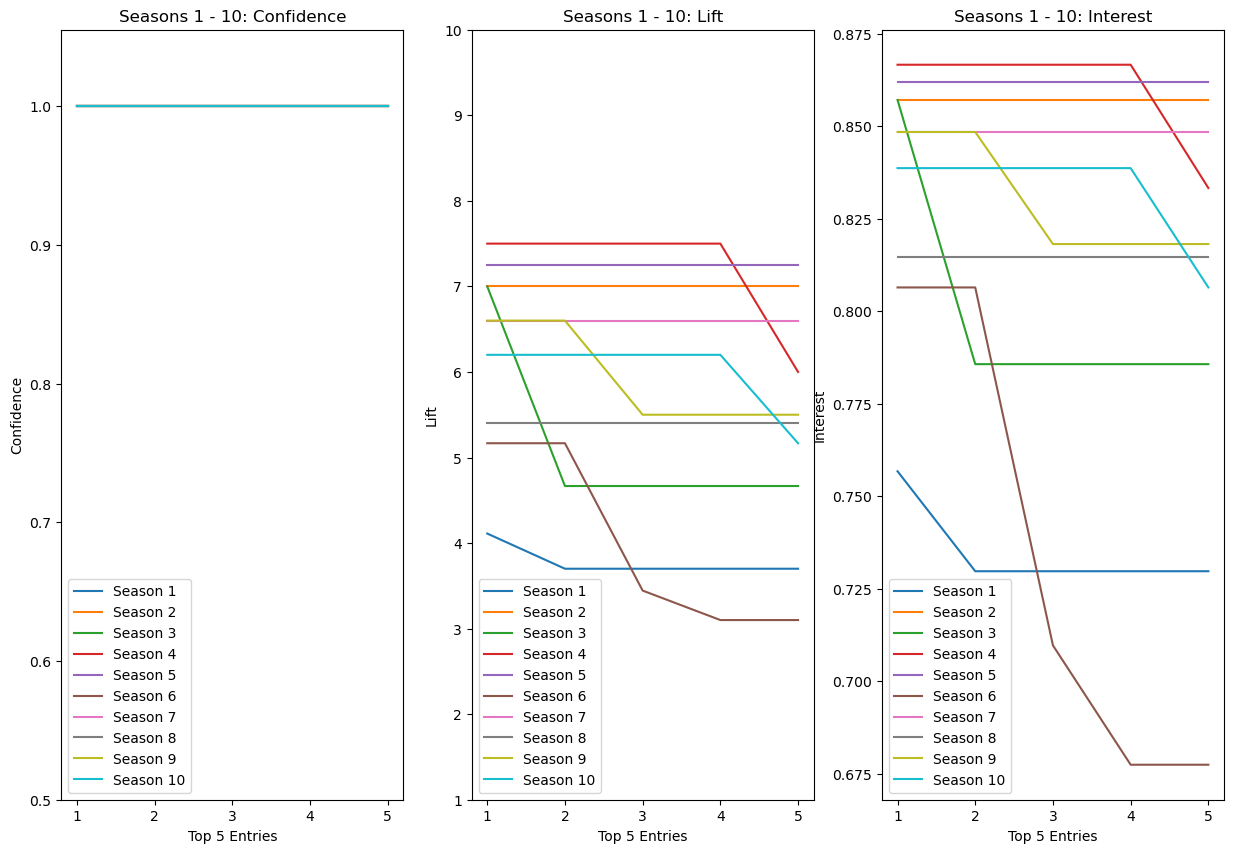

In [961]:

x = [1, 2, 3, 4, 5]
fig, ax= plt.subplots(1, 3, figsize= (15, 10))

ax[0].plot(x, rules_1[['confidence']].head(5), label= "Season 1")
ax[0].plot(x, rules_2[['confidence']].head(5), label= "Season 2")
ax[0].plot(x, rules_3[['confidence']].head(5), label= "Season 3")
ax[0].plot(x, rules_4[['confidence']].head(5), label= "Season 4")
ax[0].plot(x, rules_5[['confidence']].head(5), label= "Season 5")
ax[0].plot(x, rules_6[['confidence']].head(5), label= "Season 6")
ax[0].plot(x, rules_7[['confidence']].head(5), label= "Season 7")
ax[0].plot(x, rules_8[['confidence']].head(5), label= "Season 8")
ax[0].plot(x, rules_9[['confidence']].head(5), label= "Season 9")
ax[0].plot(x, rules_10[['confidence']].head(5), label= "Season 10")
ax[0].set_xlabel('Top 5 Entries')
ax[0].set_ylabel('Confidence')
ax[0].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax[0].set_title('Seasons 1 - 10: Confidence')
ax[0].legend()

ax[1].plot(x, rules_1[['lift']].head(5), label= "Season 1")
ax[1].plot(x, rules_2[['lift']].head(5), label= "Season 2")
ax[1].plot(x, rules_3[['lift']].head(5), label= "Season 3")
ax[1].plot(x, rules_4[['lift']].head(5), label= "Season 4")
ax[1].plot(x, rules_5[['lift']].head(5), label= "Season 5")
ax[1].plot(x, rules_6[['lift']].head(5), label= "Season 6")
ax[1].plot(x, rules_7[['lift']].head(5), label= "Season 7")
ax[1].plot(x, rules_8[['lift']].head(5), label= "Season 8")
ax[1].plot(x, rules_9[['lift']].head(5), label= "Season 9")
ax[1].plot(x, rules_10[['lift']].head(5), label= "Season 10")
ax[1].set_xlabel('Top 5 Entries')
ax[1].set_ylabel('Lift')
ax[1].set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax[1].set_title('Seasons 1 - 10: Lift')
ax[1].legend()

ax[2].plot(x, s1_interest, label= "Season 1")
ax[2].plot(x, s2_interest, label= "Season 2")
ax[2].plot(x, s3_interest, label= "Season 3")
ax[2].plot(x, s4_interest, label= "Season 4")
ax[2].plot(x, s5_interest, label= "Season 5")
ax[2].plot(x, s6_interest, label= "Season 6")
ax[2].plot(x, s7_interest, label= "Season 7")
ax[2].plot(x, s8_interest, label= "Season 8")
ax[2].plot(x, s9_interest, label= "Season 9")
ax[2].plot(x, s10_interest, label= "Season 10")
ax[2].set_xlabel('Top 5 Entries')
ax[2].set_ylabel('Interest')
#ax[2].set_yticks([0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9])
ax[2].set_title('Seasons 1 - 10: Interest')
ax[2].legend()
plt.savefig('s1_10.png')
plt.show()


Seasons: 11 through 20

In [803]:
s11_voting_groups = np.loadtxt("s11_voting_groups.txt", dtype= 'str').tolist()
s12_voting_groups = np.loadtxt("s12_voting_groups.txt", dtype= 'str').tolist()
s13_voting_groups = np.loadtxt("s13_voting_groups.txt", dtype= 'str').tolist()
s14_voting_groups = np.loadtxt("s14_voting_groups.txt", dtype= 'str').tolist()
s15_voting_groups = np.loadtxt("s15_voting_groups.txt", dtype= 'str').tolist()
s16_voting_groups = np.loadtxt("s16_voting_groups.txt", dtype= 'str').tolist()
s17_voting_groups = np.loadtxt("s17_voting_groups.txt", dtype= 'str').tolist()
s18_voting_groups = np.loadtxt("s18_voting_groups.txt", dtype= 'str').tolist()
s19_voting_groups = np.loadtxt("s19_voting_groups.txt", dtype= 'str').tolist()
s20_voting_groups = np.loadtxt("s20_voting_groups.txt", dtype= 'str').tolist()

s11_gender = np.loadtxt("s11_gender.txt", dtype= 'str').tolist()
s12_gender = np.loadtxt("s12_gender.txt", dtype= 'str').tolist()
s13_gender = np.loadtxt("s13_gender.txt", dtype= 'str').tolist()
s14_gender = np.loadtxt("s14_gender.txt", dtype= 'str').tolist()
s15_gender = np.loadtxt("s15_gender.txt", dtype= 'str').tolist()
s16_gender = np.loadtxt("s16_gender.txt", dtype= 'str').tolist()
s17_gender = np.loadtxt("s17_gender.txt", dtype= 'str').tolist()
s18_gender = np.loadtxt("s18_gender.txt", dtype= 'str').tolist()
s19_gender = np.loadtxt("s19_gender.txt", dtype= 'str').tolist()
s20_gender = np.loadtxt("s20_gender.txt", dtype= 'str').tolist()

s11_race = np.loadtxt("s11_race.txt", dtype= 'str').tolist()
s12_race = np.loadtxt("s12_race.txt", dtype= 'str').tolist()
s13_race = np.loadtxt("s13_race.txt", dtype= 'str').tolist()
s14_race = np.loadtxt("s14_race.txt", dtype= 'str').tolist()
s15_race = np.loadtxt("s15_race.txt", dtype= 'str').tolist()
s16_race = np.loadtxt("s16_race.txt", dtype= 'str').tolist()
s17_race = np.loadtxt("s17_race.txt", dtype= 'str').tolist()
s18_race = np.loadtxt("s18_race.txt", dtype= 'str').tolist()
s19_race = np.loadtxt("s19_race.txt", dtype= 'str').tolist()
s20_race = np.loadtxt("s20_race.txt", dtype= 'str').tolist()

In [897]:
for y in range(0, len(s11_voting_groups)):
    s11_voting_groups[y] = [x for x in s11_voting_groups[y] if str(x) != 'NA']
    s11_gender[y] = [x for x in s11_gender[y] if str(x) != 'NA']
    s11_race[y] = [x for x in s11_race[y] if str(x) != 'NA']
    s11_place[y] = [x for x in s11_place[y] if str(x) != 'NA']

for y in range(0, len(s12_voting_groups)):
    s12_voting_groups[y] = [x for x in s12_voting_groups[y] if str(x) != 'NA']
    s12_gender[y] = [x for x in s12_gender[y] if str(x) != 'NA']
    s12_race[y] = [x for x in s12_race[y] if str(x) != 'NA']
    s12_place[y] = [x for x in s12_place[y] if str(x) != 'NA']

for y in range(0, len(s13_voting_groups)):
    s13_voting_groups[y] = [x for x in s13_voting_groups[y] if str(x) != 'NA']
    s13_gender[y] = [x for x in s13_gender[y] if str(x) != 'NA']
    s13_race[y] = [x for x in s13_race[y] if str(x) != 'NA']
    s13_place[y] = [x for x in s13_place[y] if str(x) != 'NA']

for y in range(0, len(s14_voting_groups)):
    s14_voting_groups[y] = [x for x in s14_voting_groups[y] if str(x) != 'NA']
    s14_gender[y] = [x for x in s14_gender[y] if str(x) != 'NA']
    s14_race[y] = [x for x in s14_race[y] if str(x) != 'NA']  
    s14_place[y] = [x for x in s14_place[y] if str(x) != 'NA'] 

for y in range(0, len(s15_voting_groups)):
    s15_voting_groups[y] = [x for x in s15_voting_groups[y] if str(x) != 'NA']
    s15_gender[y] = [x for x in s15_gender[y] if str(x) != 'NA']
    s15_race[y] = [x for x in s15_race[y] if str(x) != 'NA'] 
    s15_place[y] = [x for x in s15_place[y] if str(x) != 'NA']  

for y in range(0, len(s16_voting_groups)):
    s16_voting_groups[y] = [x for x in s16_voting_groups[y] if str(x) != 'NA']
    s16_gender[y] = [x for x in s16_gender[y] if str(x) != 'NA']
    s16_race[y] = [x for x in s16_race[y] if str(x) != 'NA']
    s16_place[y] = [x for x in s16_place[y] if str(x) != 'NA']

for y in range(0, len(s17_voting_groups)):
    s17_voting_groups[y] = [x for x in s17_voting_groups[y] if str(x) != 'NA']
    s17_gender[y] = [x for x in s17_gender[y] if str(x) != 'NA']
    s17_race[y] = [x for x in s17_race[y] if str(x) != 'NA'] 
    s17_place[y] = [x for x in s17_place[y] if str(x) != 'NA'] 

for y in range(0, len(s18_voting_groups)):
    s18_voting_groups[y] = [x for x in s18_voting_groups[y] if str(x) != 'NA']
    s18_gender[y] = [x for x in s18_gender[y] if str(x) != 'NA']
    s18_race[y] = [x for x in s18_race[y] if str(x) != 'NA']  
    s18_place[y] = [x for x in s18_place[y] if str(x) != 'NA']

for y in range(0, len(s19_voting_groups)):
    s19_voting_groups[y] = [x for x in s19_voting_groups[y] if str(x) != 'NA']
    s19_gender[y] = [x for x in s19_gender[y] if str(x) != 'NA']
    s19_race[y] = [x for x in s19_race[y] if str(x) != 'NA'] 
    s19_place[y] = [x for x in s19_place[y] if str(x) != 'NA'] 

for y in range(0, len(s20_voting_groups)):
    s20_voting_groups[y] = [x for x in s20_voting_groups[y] if str(x) != 'NA']
    s20_gender[y] = [x for x in s20_gender[y] if str(x) != 'NA']
    s20_race[y] = [x for x in s20_race[y] if str(x) != 'NA']     
    s20_place[y] = [x for x in s20_place[y] if str(x) != 'NA']    

In [988]:
S11 = TransactionEncoder()
S12 = TransactionEncoder()
S13 = TransactionEncoder()
S14 = TransactionEncoder()
S15 = TransactionEncoder()
S16 = TransactionEncoder()
S17 = TransactionEncoder()
S18 = TransactionEncoder()
S19 = TransactionEncoder()
S20 = TransactionEncoder()

In [989]:
minimum_support = 0.1

S11_ary = S11.fit(s11_voting_groups).transform(s11_voting_groups)
S11_df = pd.DataFrame(S11_ary, columns= S11.columns_)
S11_freq = apriori(S11_df, min_support= minimum_support, use_colnames=True)

S12_ary = S12.fit(s12_voting_groups).transform(s12_voting_groups)
S12_df = pd.DataFrame(S12_ary, columns= S12.columns_)
S12_freq = apriori(S12_df, min_support= minimum_support, use_colnames=True)

S13_ary = S13.fit(s13_voting_groups).transform(s13_voting_groups)
S13_df = pd.DataFrame(S13_ary, columns= S13.columns_)
S13_freq = apriori(S13_df, min_support= minimum_support, use_colnames=True)

S14_ary = S14.fit(s14_voting_groups).transform(s14_voting_groups)
S14_df = pd.DataFrame(S14_ary, columns= S14.columns_)
S14_freq = apriori(S14_df, min_support= minimum_support, use_colnames=True)

S15_ary = S15.fit(s15_voting_groups).transform(s15_voting_groups)
S15_df = pd.DataFrame(S15_ary, columns= S15.columns_)
S15_freq = apriori(S15_df, min_support= minimum_support, use_colnames=True)

S16_ary = S16.fit(s16_voting_groups).transform(s16_voting_groups)
S16_df = pd.DataFrame(S16_ary, columns= S16.columns_)
S16_freq = apriori(S16_df, min_support= minimum_support, use_colnames=True)

S17_ary = S17.fit(s17_voting_groups).transform(s17_voting_groups)
S17_df = pd.DataFrame(S17_ary, columns= S17.columns_)
S17_freq = apriori(S17_df, min_support= minimum_support, use_colnames=True)

S18_ary = S18.fit(s18_voting_groups).transform(s18_voting_groups)
S18_df = pd.DataFrame(S18_ary, columns= S18.columns_)
S18_freq = apriori(S18_df, min_support= minimum_support, use_colnames=True)

S19_ary = S19.fit(s19_voting_groups).transform(s19_voting_groups)
S19_df = pd.DataFrame(S19_ary, columns= S19.columns_)
S19_freq = apriori(S19_df, min_support= minimum_support, use_colnames=True)

S20_ary = S20.fit(s20_voting_groups).transform(s20_voting_groups)
S20_df = pd.DataFrame(S20_ary, columns= S20.columns_)
S20_freq = apriori(S20_df, min_support= minimum_support, use_colnames=True)

In [990]:
minimum_confidence = 0.5

rules_11 = association_rules(S11_freq, num_itemsets=len(S11_freq), metric="confidence", min_threshold= minimum_confidence)
rules_12 = association_rules(S12_freq, num_itemsets=len(S12_freq), metric="confidence", min_threshold= minimum_confidence)
rules_13 = association_rules(S13_freq, num_itemsets=len(S13_freq), metric="confidence", min_threshold= minimum_confidence)
rules_14 = association_rules(S14_freq, num_itemsets=len(S14_freq), metric="confidence", min_threshold= minimum_confidence)
rules_15 = association_rules(S15_freq, num_itemsets=len(S15_freq), metric="confidence", min_threshold= minimum_confidence)
rules_16 = association_rules(S16_freq, num_itemsets=len(S16_freq), metric="confidence", min_threshold= minimum_confidence)
rules_17 = association_rules(S17_freq, num_itemsets=len(S17_freq), metric="confidence", min_threshold= minimum_confidence)
rules_18 = association_rules(S18_freq, num_itemsets=len(S18_freq), metric="confidence", min_threshold= minimum_confidence)
rules_19 = association_rules(S19_freq, num_itemsets=len(S19_freq), metric="confidence", min_threshold= minimum_confidence)
rules_20 = association_rules(S20_freq, num_itemsets=len(S20_freq), metric="confidence", min_threshold= minimum_confidence)

rules_11.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_12.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_13.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_14.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_15.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_16.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_17.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_18.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_19.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_20.sort_values(['confidence', 'lift'], ascending=False, inplace=True)

In [991]:
s11_interest = abs(rules_11['confidence'] - rules_11['consequent support']).head(5)
s12_interest = abs(rules_12['confidence'] - rules_12['consequent support']).head(5)
s13_interest = abs(rules_13['confidence'] - rules_13['consequent support']).head(5)
s14_interest = abs(rules_14['confidence'] - rules_14['consequent support']).head(5)
s15_interest = abs(rules_15['confidence'] - rules_15['consequent support']).head(5)
s16_interest = abs(rules_16['confidence'] - rules_16['consequent support']).head(5)
s17_interest = abs(rules_17['confidence'] - rules_17['consequent support']).head(5)
s18_interest = abs(rules_18['confidence'] - rules_18['consequent support']).head(5)
s19_interest = abs(rules_19['confidence'] - rules_19['consequent support']).head(5)
s20_interest = abs(rules_20['confidence'] - rules_20['consequent support']).head(5)

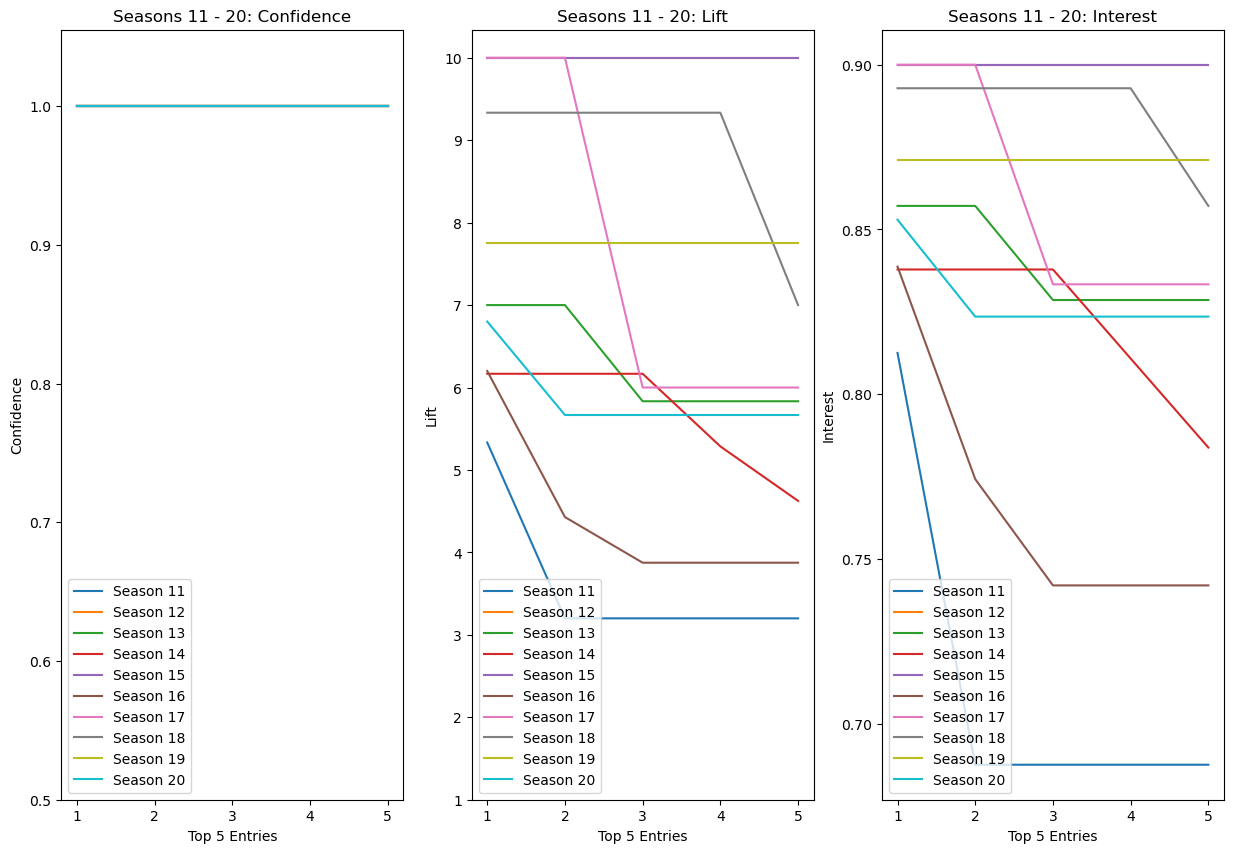

In [992]:
fig, ax= plt.subplots(1, 3, figsize= (15, 10))

ax[0].plot(x, rules_11[['confidence']].head(5), label= "Season 11")
ax[0].plot(x, rules_12[['confidence']].head(5), label= "Season 12")
ax[0].plot(x, rules_13[['confidence']].head(5), label= "Season 13")
ax[0].plot(x, rules_14[['confidence']].head(5), label= "Season 14")
ax[0].plot(x, rules_15[['confidence']].head(5), label= "Season 15")
ax[0].plot(x, rules_16[['confidence']].head(5), label= "Season 16")
ax[0].plot(x, rules_17[['confidence']].head(5), label= "Season 17")
ax[0].plot(x, rules_18[['confidence']].head(5), label= "Season 18")
ax[0].plot(x, rules_19[['confidence']].head(5), label= "Season 19")
ax[0].plot(x, rules_20[['confidence']].head(5), label= "Season 20")
ax[0].set_xlabel('Top 5 Entries')
ax[0].set_ylabel('Confidence')
ax[0].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax[0].set_title('Seasons 11 - 20: Confidence')
ax[0].legend()

ax[1].plot(x, rules_11[['lift']].head(5), label= "Season 11")
ax[1].plot(x, rules_12[['lift']].head(5), label= "Season 12")
ax[1].plot(x, rules_13[['lift']].head(5), label= "Season 13")
ax[1].plot(x, rules_14[['lift']].head(5), label= "Season 14")
ax[1].plot(x, rules_15[['lift']].head(5), label= "Season 15")
ax[1].plot(x, rules_16[['lift']].head(5), label= "Season 16")
ax[1].plot(x, rules_17[['lift']].head(5), label= "Season 17")
ax[1].plot(x, rules_18[['lift']].head(5), label= "Season 18")
ax[1].plot(x, rules_19[['lift']].head(5), label= "Season 19")
ax[1].plot(x, rules_20[['lift']].head(5), label= "Season 20")
ax[1].set_xlabel('Top 5 Entries')
ax[1].set_ylabel('Lift')
ax[1].set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax[1].set_title('Seasons 11 - 20: Lift')
ax[1].legend()

ax[2].plot(x, s11_interest, label= "Season 11")
ax[2].plot(x, s12_interest, label= "Season 12")
ax[2].plot(x, s13_interest, label= "Season 13")
ax[2].plot(x, s14_interest, label= "Season 14")
ax[2].plot(x, s15_interest, label= "Season 15")
ax[2].plot(x, s16_interest, label= "Season 16")
ax[2].plot(x, s17_interest, label= "Season 17")
ax[2].plot(x, s18_interest, label= "Season 18")
ax[2].plot(x, s19_interest, label= "Season 19")
ax[2].plot(x, s20_interest, label= "Season 20")
ax[2].set_xlabel('Top 5 Entries')
ax[2].set_ylabel('Interest')
#ax[2].set_yticks([0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9])
ax[2].set_title('Seasons 11 - 20: Interest')
ax[2].legend()
plt.savefig('s11_20.png')
plt.show()

In [999]:
s21_voting_groups = np.loadtxt("s21_voting_groups.txt", dtype= 'str').tolist()
s22_voting_groups = np.loadtxt("s22_voting_groups.txt", dtype= 'str').tolist()
s23_voting_groups = np.loadtxt("s23_voting_groups.txt", dtype= 'str').tolist()
s24_voting_groups = np.loadtxt("s24_voting_groups.txt", dtype= 'str').tolist()
s25_voting_groups = np.loadtxt("s25_voting_groups.txt", dtype= 'str').tolist()
s26_voting_groups = np.loadtxt("s26_voting_groups.txt", dtype= 'str').tolist()
s27_voting_groups = np.loadtxt("s27_voting_groups.txt", dtype= 'str').tolist()
s28_voting_groups = np.loadtxt("s28_voting_groups.txt", dtype= 'str').tolist()
s29_voting_groups = np.loadtxt("s29_voting_groups.txt", dtype= 'str').tolist()
s30_voting_groups = np.loadtxt("s30_voting_groups.txt", dtype= 'str').tolist()

s21_gender = np.loadtxt("s21_gender.txt", dtype= 'str').tolist()
s22_gender = np.loadtxt("s22_gender.txt", dtype= 'str').tolist()
s23_gender = np.loadtxt("s23_gender.txt", dtype= 'str').tolist()
s24_gender = np.loadtxt("s24_gender.txt", dtype= 'str').tolist()
s25_gender = np.loadtxt("s25_gender.txt", dtype= 'str').tolist()
s26_gender = np.loadtxt("s26_gender.txt", dtype= 'str').tolist()
s27_gender = np.loadtxt("s27_gender.txt", dtype= 'str').tolist()
s28_gender = np.loadtxt("s28_gender.txt", dtype= 'str').tolist()
s29_gender = np.loadtxt("s29_gender.txt", dtype= 'str').tolist()
s30_gender = np.loadtxt("s30_gender.txt", dtype= 'str').tolist()

s21_race = np.loadtxt("s21_race.txt", dtype= 'str').tolist()
s22_race = np.loadtxt("s22_race.txt", dtype= 'str').tolist()
s23_race = np.loadtxt("s23_race.txt", dtype= 'str').tolist()
s24_race = np.loadtxt("s24_race.txt", dtype= 'str').tolist()
s25_race = np.loadtxt("s25_race.txt", dtype= 'str').tolist()
s26_race = np.loadtxt("s26_race.txt", dtype= 'str').tolist()
s27_race = np.loadtxt("s27_race.txt", dtype= 'str').tolist()
s28_race = np.loadtxt("s28_race.txt", dtype= 'str').tolist()
s29_race = np.loadtxt("s29_race.txt", dtype= 'str').tolist()
s30_race = np.loadtxt("s30_race.txt", dtype= 'str').tolist()

In [1000]:
for y in range(0, len(s21_voting_groups)):
    s21_voting_groups[y] = [x for x in s21_voting_groups[y] if str(x) != 'NA']
    s21_gender[y] = [x for x in s21_gender[y] if str(x) != 'NA']
    s21_race[y] = [x for x in s21_race[y] if str(x) != 'NA']
    s21_place[y] = [x for x in s21_place[y] if str(x) != 'NA']

for y in range(0, len(s22_voting_groups)):
    s22_voting_groups[y] = [x for x in s22_voting_groups[y] if str(x) != 'NA']
    s22_gender[y] = [x for x in s22_gender[y] if str(x) != 'NA']
    s22_race[y] = [x for x in s22_race[y] if str(x) != 'NA']
    s22_place[y] = [x for x in s22_place[y] if str(x) != 'NA']

for y in range(0, len(s23_voting_groups)):
    s23_voting_groups[y] = [x for x in s23_voting_groups[y] if str(x) != 'NA']
    s23_gender[y] = [x for x in s23_gender[y] if str(x) != 'NA']
    s23_race[y] = [x for x in s23_race[y] if str(x) != 'NA']
    s23_place[y] = [x for x in s23_place[y] if str(x) != 'NA']

for y in range(0, len(s24_voting_groups)):
    s24_voting_groups[y] = [x for x in s24_voting_groups[y] if str(x) != 'NA']
    s24_gender[y] = [x for x in s24_gender[y] if str(x) != 'NA']
    s24_race[y] = [x for x in s24_race[y] if str(x) != 'NA'] 
    s24_place[y] = [x for x in s24_place[y] if str(x) != 'NA']  

for y in range(0, len(s25_voting_groups)):
    s25_voting_groups[y] = [x for x in s25_voting_groups[y] if str(x) != 'NA']
    s25_gender[y] = [x for x in s25_gender[y] if str(x) != 'NA']
    s25_race[y] = [x for x in s25_race[y] if str(x) != 'NA'] 
    s25_place[y] = [x for x in s25_place[y] if str(x) != 'NA']  

for y in range(0, len(s26_voting_groups)):
    s26_voting_groups[y] = [x for x in s26_voting_groups[y] if str(x) != 'NA']
    s26_gender[y] = [x for x in s26_gender[y] if str(x) != 'NA']
    s26_race[y] = [x for x in s26_race[y] if str(x) != 'NA']
    s26_place[y] = [x for x in s26_place[y] if str(x) != 'NA']

for y in range(0, len(s27_voting_groups)):
    s27_voting_groups[y] = [x for x in s27_voting_groups[y] if str(x) != 'NA']
    s27_gender[y] = [x for x in s27_gender[y] if str(x) != 'NA']
    s27_race[y] = [x for x in s27_race[y] if str(x) != 'NA']  
    s27_place[y] = [x for x in s27_place[y] if str(x) != 'NA']

for y in range(0, len(s28_voting_groups)):
    s28_voting_groups[y] = [x for x in s28_voting_groups[y] if str(x) != 'NA']
    s28_gender[y] = [x for x in s28_gender[y] if str(x) != 'NA']
    s28_race[y] = [x for x in s28_race[y] if str(x) != 'NA']  
    s28_place[y] = [x for x in s28_place[y] if str(x) != 'NA']

for y in range(0, len(s29_voting_groups)):
    s29_voting_groups[y] = [x for x in s29_voting_groups[y] if str(x) != 'NA']
    s29_gender[y] = [x for x in s29_gender[y] if str(x) != 'NA']
    s29_race[y] = [x for x in s29_race[y] if str(x) != 'NA']  
    s29_place[y] = [x for x in s29_place[y] if str(x) != 'NA']

for y in range(0, len(s30_voting_groups)):
    s30_voting_groups[y] = [x for x in s30_voting_groups[y] if str(x) != 'NA']
    s30_gender[y] = [x for x in s30_gender[y] if str(x) != 'NA']
    s30_race[y] = [x for x in s30_race[y] if str(x) != 'NA'] 
    s30_place[y] = [x for x in s30_place[y] if str(x) != 'NA']        

In [1001]:
S21 = TransactionEncoder()
S22 = TransactionEncoder()
S23 = TransactionEncoder()
S24 = TransactionEncoder()
S25 = TransactionEncoder()
S26 = TransactionEncoder()
S27 = TransactionEncoder()
S28 = TransactionEncoder()
S29 = TransactionEncoder()
S30 = TransactionEncoder()

In [1002]:
minimum_support = 0.1

S21_ary = S21.fit(s21_voting_groups).transform(s21_voting_groups)
S21_df = pd.DataFrame(S21_ary, columns= S21.columns_)
S21_freq = apriori(S21_df, min_support= minimum_support, use_colnames=True)

S22_ary = S22.fit(s22_voting_groups).transform(s22_voting_groups)
S22_df = pd.DataFrame(S22_ary, columns= S22.columns_)
S22_freq = apriori(S22_df, min_support= minimum_support, use_colnames=True)

S23_ary = S23.fit(s23_voting_groups).transform(s23_voting_groups)
S23_df = pd.DataFrame(S23_ary, columns= S23.columns_)
S23_freq = apriori(S23_df, min_support= minimum_support, use_colnames=True)

S24_ary = S24.fit(s24_voting_groups).transform(s24_voting_groups)
S24_df = pd.DataFrame(S24_ary, columns= S24.columns_)
S24_freq = apriori(S24_df, min_support= minimum_support, use_colnames=True)

S25_ary = S25.fit(s25_voting_groups).transform(s25_voting_groups)
S25_df = pd.DataFrame(S25_ary, columns= S25.columns_)
S25_freq = apriori(S25_df, min_support= minimum_support, use_colnames=True)

S26_ary = S26.fit(s26_voting_groups).transform(s26_voting_groups)
S26_df = pd.DataFrame(S26_ary, columns= S26.columns_)
S26_freq = apriori(S26_df, min_support= minimum_support, use_colnames=True)

S27_ary = S27.fit(s27_voting_groups).transform(s27_voting_groups)
S27_df = pd.DataFrame(S27_ary, columns= S27.columns_)
S27_freq = apriori(S27_df, min_support= minimum_support, use_colnames=True)

S28_ary = S28.fit(s28_voting_groups).transform(s28_voting_groups)
S28_df = pd.DataFrame(S28_ary, columns= S28.columns_)
S28_freq = apriori(S28_df, min_support= minimum_support, use_colnames=True)

S29_ary = S29.fit(s29_voting_groups).transform(s29_voting_groups)
S29_df = pd.DataFrame(S29_ary, columns= S29.columns_)
S29_freq = apriori(S29_df, min_support= minimum_support, use_colnames=True)

S30_ary = S30.fit(s30_voting_groups).transform(s30_voting_groups)
S30_df = pd.DataFrame(S30_ary, columns= S30.columns_)
S30_freq = apriori(S30_df, min_support= minimum_support, use_colnames=True)

In [1003]:
minimum_confidence = 0.5

rules_21 = association_rules(S21_freq, num_itemsets=len(S21_freq), metric="confidence", min_threshold= minimum_confidence)
rules_22 = association_rules(S22_freq, num_itemsets=len(S22_freq), metric="confidence", min_threshold= minimum_confidence)
rules_23 = association_rules(S23_freq, num_itemsets=len(S23_freq), metric="confidence", min_threshold= minimum_confidence)
rules_24 = association_rules(S24_freq, num_itemsets=len(S24_freq), metric="confidence", min_threshold= minimum_confidence)
rules_25 = association_rules(S25_freq, num_itemsets=len(S25_freq), metric="confidence", min_threshold= minimum_confidence)
rules_26 = association_rules(S26_freq, num_itemsets=len(S26_freq), metric="confidence", min_threshold= minimum_confidence)
rules_27 = association_rules(S27_freq, num_itemsets=len(S27_freq), metric="confidence", min_threshold= minimum_confidence)
rules_28 = association_rules(S28_freq, num_itemsets=len(S28_freq), metric="confidence", min_threshold= minimum_confidence)
rules_29 = association_rules(S29_freq, num_itemsets=len(S29_freq), metric="confidence", min_threshold= minimum_confidence)
rules_30 = association_rules(S30_freq, num_itemsets=len(S30_freq), metric="confidence", min_threshold= minimum_confidence)

rules_21.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_22.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_23.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_24.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_25.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_26.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_27.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_28.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_29.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_30.sort_values(['confidence', 'lift'], ascending=False, inplace=True)

In [1004]:
s21_interest = abs(rules_21['confidence'] - rules_21['consequent support']).head(5)
s22_interest = abs(rules_22['confidence'] - rules_22['consequent support']).head(5)
s23_interest = abs(rules_23['confidence'] - rules_23['consequent support']).head(5)
s24_interest = abs(rules_24['confidence'] - rules_24['consequent support']).head(5)
s25_interest = abs(rules_25['confidence'] - rules_25['consequent support']).head(5)
s26_interest = abs(rules_26['confidence'] - rules_26['consequent support']).head(5)
s27_interest = abs(rules_27['confidence'] - rules_27['consequent support']).head(5)
s28_interest = abs(rules_28['confidence'] - rules_28['consequent support']).head(5)
s29_interest = abs(rules_29['confidence'] - rules_29['consequent support']).head(5)
s30_interest = abs(rules_30['confidence'] - rules_30['consequent support']).head(5)

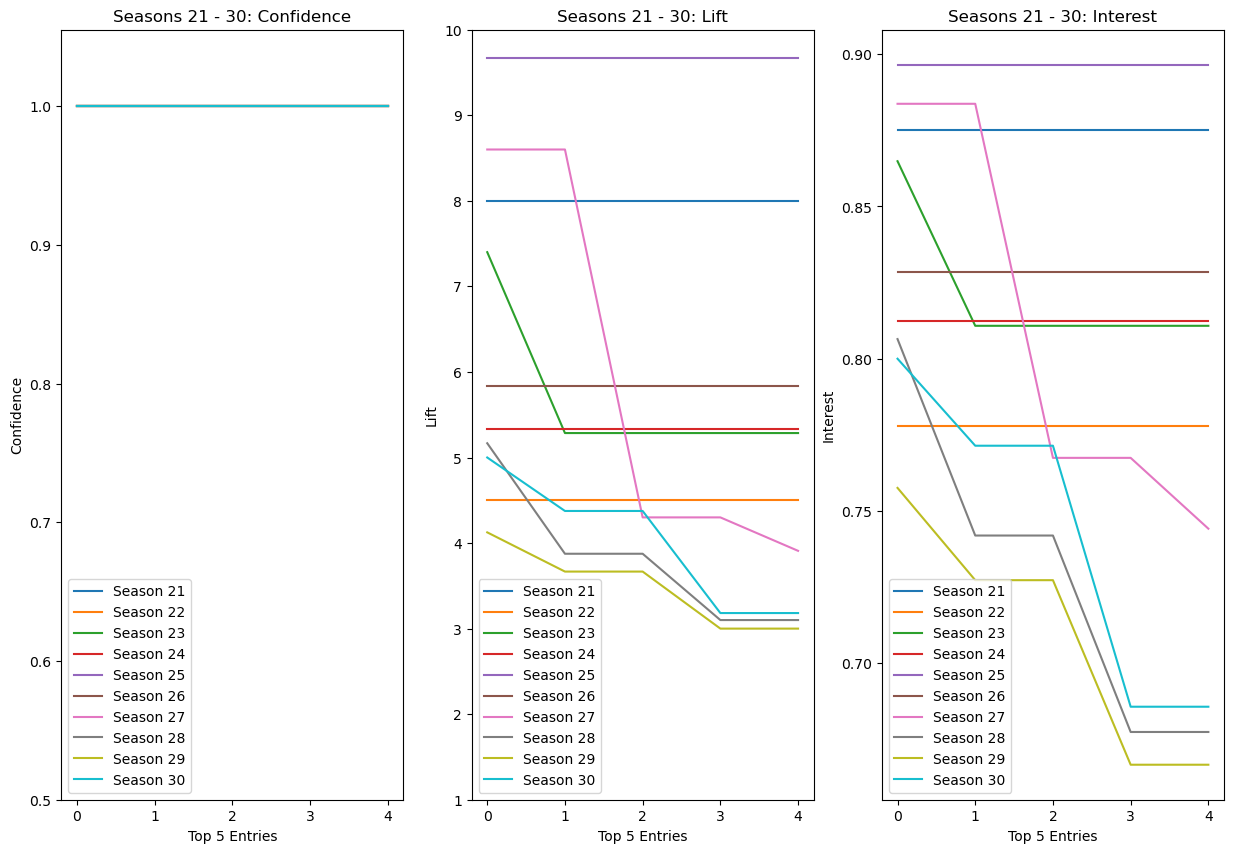

In [1005]:
x = range(0, 5)
fig, ax= plt.subplots(1, 3, figsize= (15, 10))

ax[0].plot(x, rules_21[['confidence']].head(5), label= "Season 21")
ax[0].plot(x, rules_22[['confidence']].head(5), label= "Season 22")
ax[0].plot(x, rules_23[['confidence']].head(5), label= "Season 23")
ax[0].plot(x, rules_24[['confidence']].head(5), label= "Season 24")
ax[0].plot(x, rules_25[['confidence']].head(5), label= "Season 25")
ax[0].plot(x, rules_26[['confidence']].head(5), label= "Season 26")
ax[0].plot(x, rules_27[['confidence']].head(5), label= "Season 27")
ax[0].plot(x, rules_28[['confidence']].head(5), label= "Season 28")
ax[0].plot(x, rules_29[['confidence']].head(5), label= "Season 29")
ax[0].plot(x, rules_30[['confidence']].head(5), label= "Season 30")
ax[0].set_xlabel('Top 5 Entries')
ax[0].set_ylabel('Confidence')
ax[0].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax[0].set_title('Seasons 21 - 30: Confidence')
ax[0].legend()

ax[1].plot(x, rules_21[['lift']].head(5), label= "Season 21")
ax[1].plot(x, rules_22[['lift']].head(5), label= "Season 22")
ax[1].plot(x, rules_23[['lift']].head(5), label= "Season 23")
ax[1].plot(x, rules_24[['lift']].head(5), label= "Season 24")
ax[1].plot(x, rules_25[['lift']].head(5), label= "Season 25")
ax[1].plot(x, rules_26[['lift']].head(5), label= "Season 26")
ax[1].plot(x, rules_27[['lift']].head(5), label= "Season 27")
ax[1].plot(x, rules_28[['lift']].head(5), label= "Season 28")
ax[1].plot(x, rules_29[['lift']].head(5), label= "Season 29")
ax[1].plot(x, rules_30[['lift']].head(5), label= "Season 30")
ax[1].set_xlabel('Top 5 Entries')
ax[1].set_ylabel('Lift')
ax[1].set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax[1].set_title('Seasons 21 - 30: Lift')
ax[1].legend()

ax[2].plot(x, s21_interest, label= "Season 21")
ax[2].plot(x, s22_interest, label= "Season 22")
ax[2].plot(x, s23_interest, label= "Season 23")
ax[2].plot(x, s24_interest, label= "Season 24")
ax[2].plot(x, s25_interest, label= "Season 25")
ax[2].plot(x, s26_interest, label= "Season 26")
ax[2].plot(x, s27_interest, label= "Season 27")
ax[2].plot(x, s28_interest, label= "Season 28")
ax[2].plot(x, s29_interest, label= "Season 29")
ax[2].plot(x, s30_interest, label= "Season 30")
ax[2].set_xlabel('Top 5 Entries')
ax[2].set_ylabel('Interest')
#ax[2].set_yticks([0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9])
ax[2].set_title('Seasons 21 - 30: Interest')
ax[2].legend()
plt.savefig('s21_30.png')
plt.show()

In [1025]:
s31_voting_groups = np.loadtxt("s31_voting_groups.txt", dtype= 'str').tolist()
s32_voting_groups = np.loadtxt("s32_voting_groups.txt", dtype= 'str').tolist()
s33_voting_groups = np.loadtxt("s33_voting_groups.txt", dtype= 'str').tolist()
s34_voting_groups = np.loadtxt("s34_voting_groups.txt", dtype= 'str').tolist()
s35_voting_groups = np.loadtxt("s35_voting_groups.txt", dtype= 'str').tolist()
s36_voting_groups = np.loadtxt("s36_voting_groups.txt", dtype= 'str').tolist()
s37_voting_groups = np.loadtxt("s37_voting_groups.txt", dtype= 'str').tolist()
s38_voting_groups = np.loadtxt("s38_voting_groups.txt", dtype= 'str').tolist()
s39_voting_groups = np.loadtxt("s39_voting_groups.txt", dtype= 'str').tolist()
s40_voting_groups = np.loadtxt("s40_voting_groups.txt", dtype= 'str').tolist()

s31_gender = np.loadtxt("s31_gender.txt", dtype= 'str').tolist()
s32_gender = np.loadtxt("s32_gender.txt", dtype= 'str').tolist()
s33_gender = np.loadtxt("s33_gender.txt", dtype= 'str').tolist()
s34_gender = np.loadtxt("s34_gender.txt", dtype= 'str').tolist()
s35_gender = np.loadtxt("s35_gender.txt", dtype= 'str').tolist()
s36_gender = np.loadtxt("s36_gender.txt", dtype= 'str').tolist()
s37_gender = np.loadtxt("s37_gender.txt", dtype= 'str').tolist()
s38_gender = np.loadtxt("s38_gender.txt", dtype= 'str').tolist()
s39_gender = np.loadtxt("s39_gender.txt", dtype= 'str').tolist()
s40_gender = np.loadtxt("s40_gender.txt", dtype= 'str').tolist()

s31_race = np.loadtxt("s31_race.txt", dtype= 'str').tolist()
s32_race = np.loadtxt("s32_race.txt", dtype= 'str').tolist()
s33_race = np.loadtxt("s33_race.txt", dtype= 'str').tolist()
s34_race = np.loadtxt("s34_race.txt", dtype= 'str').tolist()
s35_race = np.loadtxt("s35_race.txt", dtype= 'str').tolist()
s36_race = np.loadtxt("s36_race.txt", dtype= 'str').tolist()
s37_race = np.loadtxt("s37_race.txt", dtype= 'str').tolist()
s38_race = np.loadtxt("s38_race.txt", dtype= 'str').tolist()
s39_race = np.loadtxt("s39_race.txt", dtype= 'str').tolist()
s40_race = np.loadtxt("s40_race.txt", dtype= 'str').tolist()

In [1026]:
for y in range(0, len(s31_voting_groups)):
    s31_voting_groups[y] = [x for x in s31_voting_groups[y] if str(x) != 'NA']
    s31_gender[y] = [x for x in s31_gender[y] if str(x) != 'NA']
    s31_race[y] = [x for x in s31_race[y] if str(x) != 'NA']
    s31_place[y] = [x for x in s31_place[y] if str(x) != 'NA']

for y in range(0, len(s32_voting_groups)):
    s32_voting_groups[y] = [x for x in s32_voting_groups[y] if str(x) != 'NA']
    s32_gender[y] = [x for x in s32_gender[y] if str(x) != 'NA']
    s32_race[y] = [x for x in s32_race[y] if str(x) != 'NA']
    s32_place[y] = [x for x in s32_place[y] if str(x) != 'NA']

for y in range(0, len(s33_voting_groups)):
    s33_voting_groups[y] = [x for x in s33_voting_groups[y] if str(x) != 'NA']
    s33_gender[y] = [x for x in s33_gender[y] if str(x) != 'NA']
    s33_race[y] = [x for x in s33_race[y] if str(x) != 'NA']
    s33_place[y] = [x for x in s33_place[y] if str(x) != 'NA']

for y in range(0, len(s34_voting_groups)):
    s34_voting_groups[y] = [x for x in s34_voting_groups[y] if str(x) != 'NA']
    s34_gender[y] = [x for x in s34_gender[y] if str(x) != 'NA']
    s34_race[y] = [x for x in s34_race[y] if str(x) != 'NA']
    s34_place[y] = [x for x in s34_place[y] if str(x) != 'NA']   

for y in range(0, len(s35_voting_groups)):
    s35_voting_groups[y] = [x for x in s35_voting_groups[y] if str(x) != 'NA']
    s35_gender[y] = [x for x in s35_gender[y] if str(x) != 'NA']
    s35_race[y] = [x for x in s35_race[y] if str(x) != 'NA'] 
    s35_place[y] = [x for x in s35_place[y] if str(x) != 'NA']  

for y in range(0, len(s36_voting_groups)):
    s36_voting_groups[y] = [x for x in s36_voting_groups[y] if str(x) != 'NA']
    s36_gender[y] = [x for x in s36_gender[y] if str(x) != 'NA']
    s36_race[y] = [x for x in s36_race[y] if str(x) != 'NA']
    s36_place[y] = [x for x in s36_place[y] if str(x) != 'NA']

for y in range(0, len(s37_voting_groups)):
    s37_voting_groups[y] = [x for x in s37_voting_groups[y] if str(x) != 'NA']
    s37_gender[y] = [x for x in s37_gender[y] if str(x) != 'NA']
    s37_race[y] = [x for x in s37_race[y] if str(x) != 'NA']  
    s37_place[y] = [x for x in s37_place[y] if str(x) != 'NA']

for y in range(0, len(s38_voting_groups)):
    s38_voting_groups[y] = [x for x in s38_voting_groups[y] if str(x) != 'NA']
    s38_gender[y] = [x for x in s38_gender[y] if str(x) != 'NA']
    s38_race[y] = [x for x in s38_race[y] if str(x) != 'NA']  
    s38_place[y] = [x for x in s38_place[y] if str(x) != 'NA']

for y in range(0, len(s39_voting_groups)):
    s39_voting_groups[y] = [x for x in s39_voting_groups[y] if str(x) != 'NA']
    s39_gender[y] = [x for x in s39_gender[y] if str(x) != 'NA']
    s39_race[y] = [x for x in s39_race[y] if str(x) != 'NA']  
    s39_place[y] = [x for x in s39_place[y] if str(x) != 'NA']

for y in range(0, len(s40_voting_groups)):
    s40_voting_groups[y] = [x for x in s40_voting_groups[y] if str(x) != 'NA']
    s40_gender[y] = [x for x in s40_gender[y] if str(x) != 'NA']
    s40_race[y] = [x for x in s40_race[y] if str(x) != 'NA'] 
    s40_place[y] = [x for x in s40_place[y] if str(x) != 'NA']        

In [1018]:
S31 = TransactionEncoder()
S32 = TransactionEncoder()
S33 = TransactionEncoder()
S34 = TransactionEncoder()
S35 = TransactionEncoder()
S36 = TransactionEncoder()
S37 = TransactionEncoder()
S38 = TransactionEncoder()
S39 = TransactionEncoder()
S40 = TransactionEncoder()

In [1027]:
minimum_support = 0.1

S31_ary = S31.fit(s31_voting_groups).transform(s31_voting_groups)
S31_df = pd.DataFrame(S31_ary, columns= S31.columns_)
S31_freq = apriori(S31_df, min_support= minimum_support, use_colnames=True)

S32_ary = S32.fit(s32_voting_groups).transform(s32_voting_groups)
S32_df = pd.DataFrame(S32_ary, columns= S32.columns_)
S32_freq = apriori(S32_df, min_support= minimum_support, use_colnames=True)

S33_ary = S33.fit(s33_voting_groups).transform(s33_voting_groups)
S33_df = pd.DataFrame(S33_ary, columns= S33.columns_)
S33_freq = apriori(S33_df, min_support= minimum_support, use_colnames=True)

S34_ary = S34.fit(s34_voting_groups).transform(s34_voting_groups)
S34_df = pd.DataFrame(S34_ary, columns= S34.columns_)
S34_freq = apriori(S34_df, min_support= minimum_support, use_colnames=True)

S35_ary = S35.fit(s35_voting_groups).transform(s35_voting_groups)
S35_df = pd.DataFrame(S35_ary, columns= S35.columns_)
S35_freq = apriori(S35_df, min_support= minimum_support, use_colnames=True)

S36_ary = S36.fit(s36_voting_groups).transform(s36_voting_groups)
S36_df = pd.DataFrame(S36_ary, columns= S36.columns_)
S36_freq = apriori(S36_df, min_support= minimum_support, use_colnames=True)

S37_ary = S37.fit(s37_voting_groups).transform(s37_voting_groups)
S37_df = pd.DataFrame(S37_ary, columns= S37.columns_)
S37_freq = apriori(S37_df, min_support= minimum_support, use_colnames=True)

S38_ary = S38.fit(s38_voting_groups).transform(s38_voting_groups)
S38_df = pd.DataFrame(S38_ary, columns= S38.columns_)
S38_freq = apriori(S38_df, min_support= minimum_support, use_colnames=True)

S39_ary = S39.fit(s39_voting_groups).transform(s39_voting_groups)
S39_df = pd.DataFrame(S39_ary, columns= S39.columns_)
S39_freq = apriori(S39_df, min_support= minimum_support, use_colnames=True)

S40_ary = S40.fit(s40_voting_groups).transform(s40_voting_groups)
S40_df = pd.DataFrame(S40_ary, columns= S40.columns_)
S40_freq = apriori(S40_df, min_support= minimum_support, use_colnames=True)

In [1029]:
minimum_confidence = 0.5

rules_31 = association_rules(S31_freq, num_itemsets=len(S31_freq), metric="confidence", min_threshold= minimum_confidence)
rules_32 = association_rules(S32_freq, num_itemsets=len(S32_freq), metric="confidence", min_threshold= minimum_confidence)
rules_33 = association_rules(S33_freq, num_itemsets=len(S33_freq), metric="confidence", min_threshold= minimum_confidence)
rules_34 = association_rules(S34_freq, num_itemsets=len(S34_freq), metric="confidence", min_threshold= minimum_confidence)
rules_35 = association_rules(S35_freq, num_itemsets=len(S35_freq), metric="confidence", min_threshold= minimum_confidence)
rules_36 = association_rules(S36_freq, num_itemsets=len(S36_freq), metric="confidence", min_threshold= minimum_confidence)
rules_37 = association_rules(S37_freq, num_itemsets=len(S37_freq), metric="confidence", min_threshold= minimum_confidence)
rules_38 = association_rules(S38_freq, num_itemsets=len(S38_freq), metric="confidence", min_threshold= minimum_confidence)
rules_39 = association_rules(S39_freq, num_itemsets=len(S39_freq), metric="confidence", min_threshold= minimum_confidence)
rules_40 = association_rules(S40_freq, num_itemsets=len(S40_freq), metric="confidence", min_threshold= minimum_confidence)

rules_31.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_32.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_33.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_34.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_35.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_36.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_37.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_38.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_39.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_40.sort_values(['confidence', 'lift'], ascending=False, inplace=True)

In [1030]:
s31_interest = abs(rules_31['confidence'] - rules_31['consequent support']).head(5)
s32_interest = abs(rules_32['confidence'] - rules_32['consequent support']).head(5)
s33_interest = abs(rules_33['confidence'] - rules_33['consequent support']).head(5)
s34_interest = abs(rules_34['confidence'] - rules_34['consequent support']).head(5)
s35_interest = abs(rules_35['confidence'] - rules_35['consequent support']).head(5)
s36_interest = abs(rules_36['confidence'] - rules_36['consequent support']).head(5)
s37_interest = abs(rules_37['confidence'] - rules_37['consequent support']).head(5)
s38_interest = abs(rules_38['confidence'] - rules_38['consequent support']).head(5)
s39_interest = abs(rules_39['confidence'] - rules_39['consequent support']).head(5)
s40_interest = abs(rules_40['confidence'] - rules_40['consequent support']).head(5)

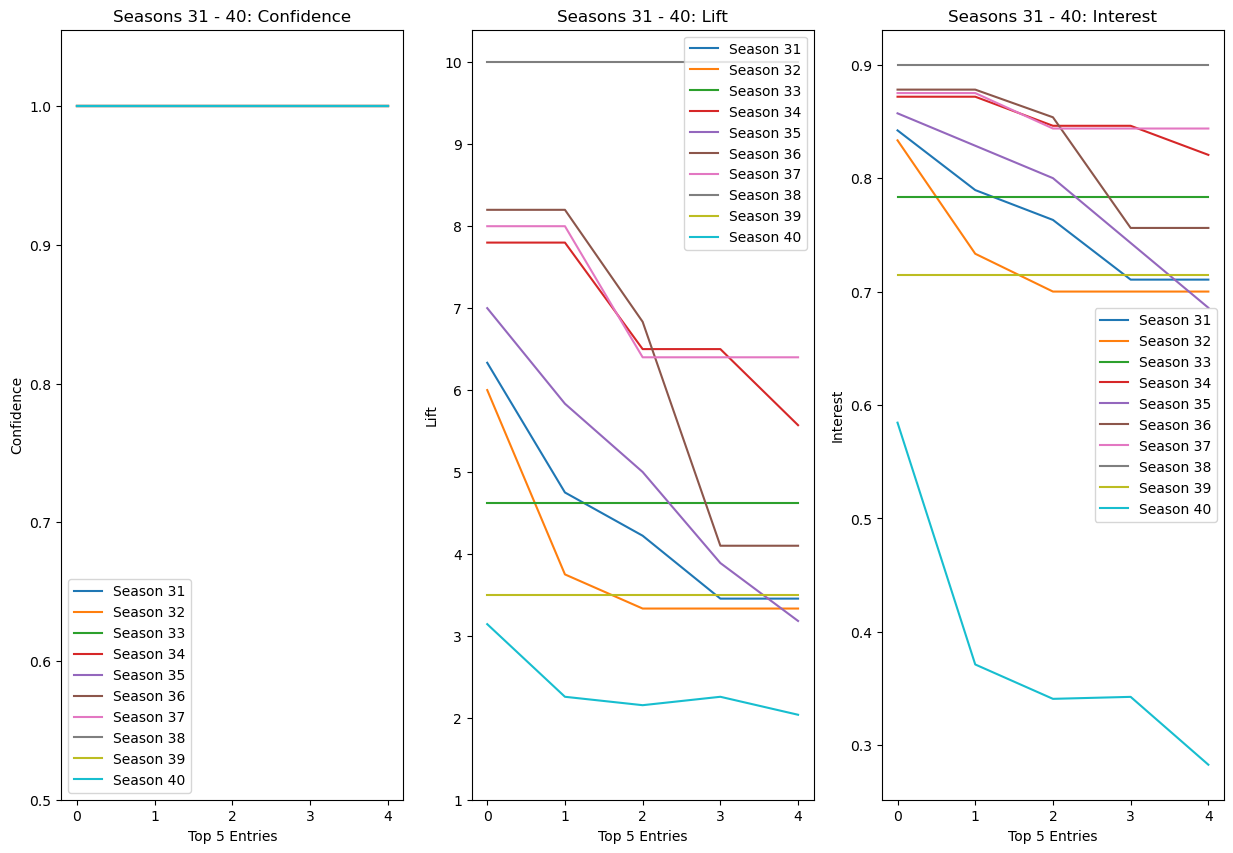

In [1031]:
fig, ax= plt.subplots(1, 3, figsize= (15, 10))

ax[0].plot(x, rules_31[['confidence']].head(5), label= "Season 31")
ax[0].plot(x, rules_32[['confidence']].head(5), label= "Season 32")
ax[0].plot(x, rules_33[['confidence']].head(5), label= "Season 33")
ax[0].plot(x, rules_34[['confidence']].head(5), label= "Season 34")
ax[0].plot(x, rules_35[['confidence']].head(5), label= "Season 35")
ax[0].plot(x, rules_36[['confidence']].head(5), label= "Season 36")
ax[0].plot(x, rules_37[['confidence']].head(5), label= "Season 37")
ax[0].plot(x, rules_38[['confidence']].head(5), label= "Season 38")
ax[0].plot(x, rules_39[['confidence']].head(5), label= "Season 39")
ax[0].plot(x, rules_30[['confidence']].head(5), label= "Season 40")
ax[0].set_xlabel('Top 5 Entries')
ax[0].set_ylabel('Confidence')
ax[0].set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax[0].set_title('Seasons 31 - 40: Confidence')
ax[0].legend()

ax[1].plot(x, rules_31[['lift']].head(5), label= "Season 31")
ax[1].plot(x, rules_32[['lift']].head(5), label= "Season 32")
ax[1].plot(x, rules_33[['lift']].head(5), label= "Season 33")
ax[1].plot(x, rules_34[['lift']].head(5), label= "Season 34")
ax[1].plot(x, rules_35[['lift']].head(5), label= "Season 35")
ax[1].plot(x, rules_36[['lift']].head(5), label= "Season 36")
ax[1].plot(x, rules_37[['lift']].head(5), label= "Season 37")
ax[1].plot(x, rules_38[['lift']].head(5), label= "Season 38")
ax[1].plot(x, rules_39[['lift']].head(5), label= "Season 39")
ax[1].plot(x, rules_40[['lift']].head(5), label= "Season 40")
ax[1].set_xlabel('Top 5 Entries')
ax[1].set_ylabel('Lift')
ax[1].set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax[1].set_title('Seasons 31 - 40: Lift')
ax[1].legend()

ax[2].plot(x, s31_interest, label= "Season 31")
ax[2].plot(x, s32_interest, label= "Season 32")
ax[2].plot(x, s33_interest, label= "Season 33")
ax[2].plot(x, s34_interest, label= "Season 34")
ax[2].plot(x, s35_interest, label= "Season 35")
ax[2].plot(x, s36_interest, label= "Season 36")
ax[2].plot(x, s37_interest, label= "Season 37")
ax[2].plot(x, s38_interest, label= "Season 38")
ax[2].plot(x, s39_interest, label= "Season 39")
ax[2].plot(x, s40_interest, label= "Season 40")
ax[2].set_xlabel('Top 5 Entries')
ax[2].set_ylabel('Interest')
#ax[2].set_yticks([0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9])
ax[2].set_title('Seasons 31 - 40: Interest')
ax[2].legend()
plt.savefig('s31_40.png')
plt.show()

In [1032]:
rules_40.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,"(""US0353"")","(""US0414"")",0.159091,0.272727,0.136364,0.857143,3.142857,1.0,0.092975,5.090909,0.810811,0.461538,0.803571,0.678571
10,"(""US0424"")","(""US0516"")",0.272727,0.295455,0.181818,0.666667,2.256410,1.0,0.101240,2.113636,0.765625,0.470588,0.526882,0.641026
5,"(""US0386"")","(""US0516"")",0.250000,0.295455,0.159091,0.636364,2.153846,1.0,0.085227,1.937500,0.714286,0.411765,0.483871,0.587413
11,"(""US0516"")","(""US0424"")",0.295455,0.272727,0.181818,0.615385,2.256410,1.0,0.101240,1.890909,0.790323,0.470588,0.471154,0.641026
9,"(""US0433"")","(""US0424"")",0.204545,0.272727,0.113636,0.555556,2.037037,1.0,0.057851,1.636364,0.640000,0.312500,0.388889,0.486111


In [829]:
mean_condfidence = [
rules_1[['confidence']].head(5)['confidence'].mean(), rules_2[['confidence']].head(5)['confidence'].mean(),
rules_3[['confidence']].head(5)['confidence'].mean(), rules_4[['confidence']].head(5)['confidence'].mean(),
rules_5[['confidence']].head(5)['confidence'].mean(), rules_6[['confidence']].head(5)['confidence'].mean(),
rules_7[['confidence']].head(5)['confidence'].mean(), rules_8[['confidence']].head(5)['confidence'].mean(),
rules_9[['confidence']].head(5)['confidence'].mean(), rules_10[['confidence']].head(5)['confidence'].mean(),

rules_11[['confidence']].head(5)['confidence'].mean(), rules_12[['confidence']].head(5)['confidence'].mean(),
rules_13[['confidence']].head(5)['confidence'].mean(), rules_14[['confidence']].head(5)['confidence'].mean(),
rules_15[['confidence']].head(5)['confidence'].mean(), rules_16[['confidence']].head(5)['confidence'].mean(),
rules_17[['confidence']].head(5)['confidence'].mean(), rules_18[['confidence']].head(5)['confidence'].mean(),
rules_19[['confidence']].head(5)['confidence'].mean(), rules_20[['confidence']].head(5)['confidence'].mean(),

rules_21[['confidence']].head(5)['confidence'].mean(), rules_22[['confidence']].head(5)['confidence'].mean(),
rules_23[['confidence']].head(5)['confidence'].mean(), rules_24[['confidence']].head(5)['confidence'].mean(),
rules_25[['confidence']].head(5)['confidence'].mean(), rules_26[['confidence']].head(5)['confidence'].mean(),
rules_27[['confidence']].head(5)['confidence'].mean(), rules_28[['confidence']].head(5)['confidence'].mean(),
rules_29[['confidence']].head(5)['confidence'].mean(), rules_30[['confidence']].head(5)['confidence'].mean(),

rules_31[['confidence']].head(5)['confidence'].mean(), rules_32[['confidence']].head(5)['confidence'].mean(),
rules_33[['confidence']].head(5)['confidence'].mean(), rules_34[['confidence']].head(5)['confidence'].mean(),
rules_35[['confidence']].head(5)['confidence'].mean(), rules_36[['confidence']].head(5)['confidence'].mean(),
rules_37[['confidence']].head(5)['confidence'].mean(), rules_38[['confidence']].head(5)['confidence'].mean(),
rules_39[['confidence']].head(5)['confidence'].mean(), rules_40[['confidence']].head(5)['confidence'].mean(),]

In [1033]:
mean_lift = [
rules_1[['lift']].head(5)['lift'].mean(), rules_2[['lift']].head(5)['lift'].mean(), rules_3[['lift']].head(5)['lift'].mean(),
rules_4[['lift']].head(5)['lift'].mean(), rules_5[['lift']].head(5)['lift'].mean(), rules_6[['lift']].head(5)['lift'].mean(),
rules_7[['lift']].head(5)['lift'].mean(), rules_8[['lift']].head(5)['lift'].mean(),rules_9[['lift']].head(5)['lift'].mean(),
rules_10[['lift']].head(5)['lift'].mean(),

rules_11[['lift']].head(5)['lift'].mean(), rules_12[['lift']].head(5)['lift'].mean(), rules_13[['lift']].head(5)['lift'].mean(),
rules_14[['lift']].head(5)['lift'].mean(), rules_15[['lift']].head(5)['lift'].mean(), rules_16[['lift']].head(5)['lift'].mean(),
rules_17[['lift']].head(5)['lift'].mean(), rules_18[['lift']].head(5)['lift'].mean(), rules_19[['lift']].head(5)['lift'].mean(),
rules_20[['lift']].head(5)['lift'].mean(),

rules_21[['lift']].head(5)['lift'].mean(), rules_22[['lift']].head(5)['lift'].mean(), rules_23[['lift']].head(5)['lift'].mean(), 
rules_24[['lift']].head(5)['lift'].mean(), rules_25[['lift']].head(5)['lift'].mean(), rules_26[['lift']].head(5)['lift'].mean(),
rules_27[['lift']].head(5)['lift'].mean(), rules_28[['lift']].head(5)['lift'].mean(), rules_29[['lift']].head(5)['lift'].mean(),
rules_30[['lift']].head(5)['lift'].mean(),

rules_31[['lift']].head(5)['lift'].mean(), rules_32[['lift']].head(5)['lift'].mean(), rules_33[['lift']].head(5)['lift'].mean(),
rules_34[['lift']].head(5)['lift'].mean(), rules_35[['lift']].head(5)['lift'].mean(), rules_36[['lift']].head(5)['lift'].mean(),
rules_37[['lift']].head(5)['lift'].mean(), rules_38[['lift']].head(5)['lift'].mean(), rules_39[['lift']].head(5)['lift'].mean(),
rules_40[['lift']].head(5)['lift'].mean()]

In [1034]:
mean_interest = [
s1_interest.mean(), s2_interest.mean(), s3_interest.mean(), s4_interest.mean(), s5_interest.mean(),
s6_interest.mean(), s7_interest.mean(), s8_interest.mean(), s9_interest.mean(), s10_interest.mean(),

s11_interest.mean(), s12_interest.mean(), s13_interest.mean(), s14_interest.mean(), s15_interest.mean(),
s16_interest.mean(), s17_interest.mean(), s18_interest.mean(), s19_interest.mean(), s20_interest.mean(),

s21_interest.mean(), s22_interest.mean(), s23_interest.mean(), s24_interest.mean(), s25_interest.mean(),
s26_interest.mean(), s27_interest.mean(), s28_interest.mean(), s29_interest.mean(), s30_interest.mean(),

s31_interest.mean(), s32_interest.mean(), s33_interest.mean(), s34_interest.mean(), s35_interest.mean(),
s36_interest.mean(), s37_interest.mean(), s38_interest.mean(), s39_interest.mean(), s40_interest.mean()]

max_interest = [
s1_interest.head(1), s2_interest.head(1), s3_interest.head(1), s4_interest.head(1), s5_interest.head(1),
s6_interest.head(1), s7_interest.head(1), s8_interest.head(1), s9_interest.head(1), s10_interest.head(1),

s11_interest.head(1), s12_interest.head(1), s13_interest.head(1), s14_interest.head(1), s15_interest.head(1),
s16_interest.head(1), s17_interest.head(1), s18_interest.head(1), s19_interest.head(1), s20_interest.head(1),

s21_interest.head(1), s22_interest.head(1), s23_interest.head(1), s24_interest.head(1), s25_interest.head(1),
s26_interest.head(1), s27_interest.head(1), s28_interest.head(1), s29_interest.head(1), s30_interest.head(1),

s31_interest.head(1), s32_interest.head(1), s33_interest.head(1), s34_interest.head(1), s35_interest.head(1),
s36_interest.head(1), s37_interest.head(1), s38_interest.head(1), s39_interest.head(1), s40_interest.head(1)]

s1_10_interest = [s1_interest.mean(), s2_interest.mean(), s3_interest.mean(), s4_interest.mean(), s5_interest.mean(),
s6_interest.mean(), s7_interest.mean(), s8_interest.mean(), s9_interest.mean(), s10_interest.mean()]

s11_20_interest = [s11_interest.mean(), s12_interest.mean(), s13_interest.mean(), s14_interest.mean(), s15_interest.mean(),
s16_interest.mean(), s17_interest.mean(), s18_interest.mean(), s19_interest.mean(), s20_interest.mean()]

s21_30_interest = [s21_interest.mean(), s22_interest.mean(), s23_interest.mean(), s24_interest.mean(), s25_interest.mean(),
s26_interest.mean(), s27_interest.mean(), s28_interest.mean(), s29_interest.mean(), s30_interest.mean()]

s31_40_interest = [s31_interest.mean(), s32_interest.mean(), s33_interest.mean(), s34_interest.mean(), s35_interest.mean(),
s36_interest.mean(), s37_interest.mean(), s38_interest.mean(), s39_interest.mean(), s40_interest.mean()]


All t-tests below failed to be rejected. There is no significant difference between the mean interests of each block of ten seasons.

In [ ]:
stats.ttest_1samp(a= np.subtract(s1_10_interest, s11_20_interest), popmean= 0)
stats.ttest_1samp(a= np.subtract(s1_10_interest, s21_30_interest), popmean= 0)
stats.ttest_1samp(a= np.subtract(s1_10_interest, s31_40_interest), popmean= 0)

stats.ttest_1samp(a= np.subtract(s11_20_interest, s21_30_interest), popmean= 0)
stats.ttest_1samp(a= np.subtract(s11_20_interest, s31_40_interest), popmean= 0) 

stats.ttest_1samp(a= np.subtract(s21_30_interest, s31_40_interest), popmean= 0) 

TtestResult(statistic=0.9302009053490674, pvalue=0.3765432373362698, df=9)

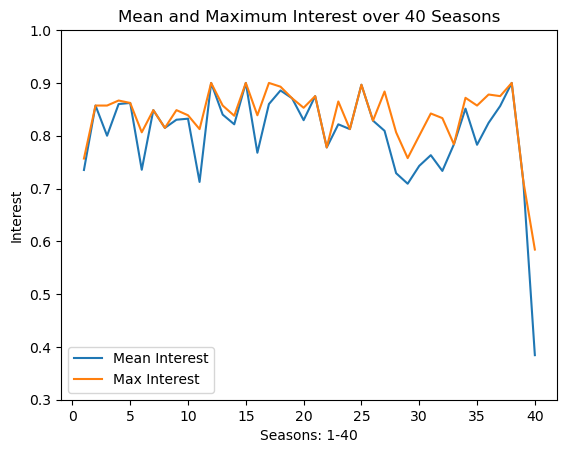

In [1036]:
x = np.arange(1, 41, 1)

plt.plot(x, mean_interest, label= 'Mean Interest')
plt.plot(x, max_interest, label= 'Max Interest')
plt.xlabel("Seasons: 1-40")
plt.ylabel("Interest")
plt.yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title("Mean and Maximum Interest over 40 Seasons")
plt.legend()
plt.savefig('mean__interest.png')
plt.show()

Not too sure what to do with the above. But moving onto clustering with gender and race.

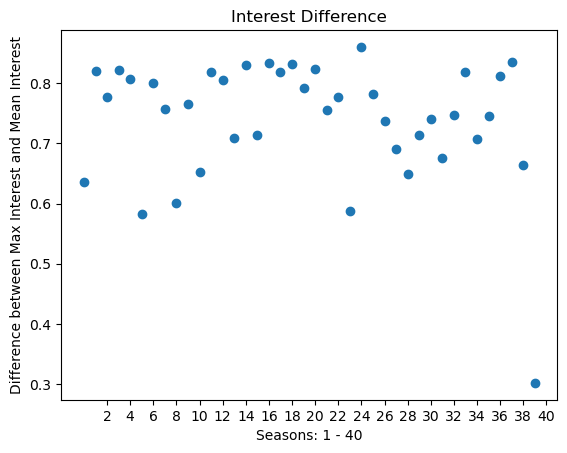

In [1094]:
plt.scatter(range(0, 40), np.subtract(mean_interest, max_interest))
plt.xlabel("Seasons: 1 - 40")
plt.ylabel("Difference between Max Interest and Mean Interest")
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40])
plt.title('Interest Difference')
plt.savefig('s1_40_max_min_diff.png')
plt.show()

In [773]:
s1_gender_count = pd.DataFrame(np.loadtxt("s1_gender_count.txt", dtype= 'str').tolist())
s2_gender_count = pd.DataFrame(np.loadtxt("s2_gender_count.txt", dtype= 'str').tolist())
s3_gender_count = pd.DataFrame(np.loadtxt("s3_gender_count.txt", dtype= 'str').tolist())
s4_gender_count = pd.DataFrame(np.loadtxt("s4_gender_count.txt", dtype= 'str').tolist())
s5_gender_count = pd.DataFrame(np.loadtxt("s5_gender_count.txt", dtype= 'str').tolist())
s6_gender_count = pd.DataFrame(np.loadtxt("s6_gender_count.txt", dtype= 'str').tolist())
s7_gender_count = pd.DataFrame(np.loadtxt("s7_gender_count.txt", dtype= 'str').tolist())
s8_gender_count = pd.DataFrame(np.loadtxt("s8_gender_count.txt", dtype= 'str').tolist())
s9_gender_count = pd.DataFrame(np.loadtxt("s9_gender_count.txt", dtype= 'str').tolist())
s10_gender_count = pd.DataFrame(np.loadtxt("s10_gender_count.txt", dtype= 'str').tolist())

s11_gender_count = pd.DataFrame(np.loadtxt("s11_gender_count.txt", dtype= 'str').tolist())
s12_gender_count = pd.DataFrame(np.loadtxt("s12_gender_count.txt", dtype= 'str').tolist())
s13_gender_count = pd.DataFrame(np.loadtxt("s13_gender_count.txt", dtype= 'str').tolist())
s14_gender_count = pd.DataFrame(np.loadtxt("s14_gender_count.txt", dtype= 'str').tolist())
s15_gender_count = pd.DataFrame(np.loadtxt("s15_gender_count.txt", dtype= 'str').tolist())
s16_gender_count = pd.DataFrame(np.loadtxt("s16_gender_count.txt", dtype= 'str').tolist())
s17_gender_count = pd.DataFrame(np.loadtxt("s17_gender_count.txt", dtype= 'str').tolist())
s18_gender_count = pd.DataFrame(np.loadtxt("s18_gender_count.txt", dtype= 'str').tolist())
s19_gender_count = pd.DataFrame(np.loadtxt("s19_gender_count.txt", dtype= 'str').tolist())
s20_gender_count = pd.DataFrame(np.loadtxt("s20_gender_count.txt", dtype= 'str').tolist())

s21_gender_count = pd.DataFrame(np.loadtxt("s21_gender_count.txt", dtype= 'str').tolist())
s22_gender_count = pd.DataFrame(np.loadtxt("s22_gender_count.txt", dtype= 'str').tolist())
s23_gender_count = pd.DataFrame(np.loadtxt("s23_gender_count.txt", dtype= 'str').tolist())
s24_gender_count = pd.DataFrame(np.loadtxt("s24_gender_count.txt", dtype= 'str').tolist())
s25_gender_count = pd.DataFrame(np.loadtxt("s25_gender_count.txt", dtype= 'str').tolist())
s26_gender_count = pd.DataFrame(np.loadtxt("s26_gender_count.txt", dtype= 'str').tolist())
s27_gender_count = pd.DataFrame(np.loadtxt("s27_gender_count.txt", dtype= 'str').tolist())
s28_gender_count = pd.DataFrame(np.loadtxt("s28_gender_count.txt", dtype= 'str').tolist())
s29_gender_count = pd.DataFrame(np.loadtxt("s29_gender_count.txt", dtype= 'str').tolist())
s30_gender_count = pd.DataFrame(np.loadtxt("s30_gender_count.txt", dtype= 'str').tolist())

s31_gender_count = pd.DataFrame(np.loadtxt("s31_gender_count.txt", dtype= 'str').tolist())
s32_gender_count = pd.DataFrame(np.loadtxt("s32_gender_count.txt", dtype= 'str').tolist())
s33_gender_count = pd.DataFrame(np.loadtxt("s33_gender_count.txt", dtype= 'str').tolist())
s34_gender_count = pd.DataFrame(np.loadtxt("s34_gender_count.txt", dtype= 'str').tolist())
s35_gender_count = pd.DataFrame(np.loadtxt("s35_gender_count.txt", dtype= 'str').tolist())
s36_gender_count = pd.DataFrame(np.loadtxt("s36_gender_count.txt", dtype= 'str').tolist())
s37_gender_count = pd.DataFrame(np.loadtxt("s37_gender_count.txt", dtype= 'str').tolist())
s38_gender_count = pd.DataFrame(np.loadtxt("s38_gender_count.txt", dtype= 'str').tolist())
s39_gender_count = pd.DataFrame(np.loadtxt("s39_gender_count.txt", dtype= 'str').tolist())
s40_gender_count = pd.DataFrame(np.loadtxt("s40_gender_count.txt", dtype= 'str').tolist())

s1_gender_count.columns = ['Male', 'Female']
s2_gender_count.columns = ['Male', 'Female']
s3_gender_count.columns = ['Male', 'Female']
s4_gender_count.columns = ['Male', 'Female']
s5_gender_count.columns = ['Male', 'Female']
s6_gender_count.columns = ['Male', 'Female']
s7_gender_count.columns = ['Male', 'Female']
s8_gender_count.columns = ['Male', 'Female']
s9_gender_count.columns = ['Male', 'Female']
s10_gender_count.columns = ['Male', 'Female']

s11_gender_count.columns = ['Male', 'Female']
s12_gender_count.columns = ['Male', 'Female']
s13_gender_count.columns = ['Male', 'Female']
s14_gender_count.columns = ['Male', 'Female']
s15_gender_count.columns = ['Male', 'Female']
s16_gender_count.columns = ['Male', 'Female']
s17_gender_count.columns = ['Male', 'Female']
s18_gender_count.columns = ['Male', 'Female']
s19_gender_count.columns = ['Male', 'Female']
s20_gender_count.columns = ['Male', 'Female']

s21_gender_count.columns = ['Male', 'Female']
s22_gender_count.columns = ['Male', 'Female']
s23_gender_count.columns = ['Male', 'Female']
s24_gender_count.columns = ['Male', 'Female']
s25_gender_count.columns = ['Male', 'Female']
s26_gender_count.columns = ['Male', 'Female']
s27_gender_count.columns = ['Male', 'Female']
s28_gender_count.columns = ['Male', 'Female']
s29_gender_count.columns = ['Male', 'Female']
s30_gender_count.columns = ['Male', 'Female']

s31_gender_count.columns = ['Male', 'Female']
s32_gender_count.columns = ['Male', 'Female']
s33_gender_count.columns = ['Male', 'Female']
s34_gender_count.columns = ['Male', 'Female']
s35_gender_count.columns = ['Male', 'Female']
s36_gender_count.columns = ['Male', 'Female']
s37_gender_count.columns = ['Male', 'Female']
s38_gender_count.columns = ['Male', 'Female']
s39_gender_count.columns = ['Male', 'Female']
s40_gender_count.columns = ['Male', 'Female']


In [731]:
s1_race_count = pd.DataFrame(np.loadtxt("s1_race_count.txt", dtype= 'str').tolist())
s2_race_count = pd.DataFrame(np.loadtxt("s2_race_count.txt", dtype= 'str').tolist())
s3_race_count = pd.DataFrame(np.loadtxt("s3_race_count.txt", dtype= 'str').tolist())
s4_race_count = pd.DataFrame(np.loadtxt("s4_race_count.txt", dtype= 'str').tolist())
s5_race_count = pd.DataFrame(np.loadtxt("s5_race_count.txt", dtype= 'str').tolist())
s6_race_count = pd.DataFrame(np.loadtxt("s6_race_count.txt", dtype= 'str').tolist())
s7_race_count = pd.DataFrame(np.loadtxt("s7_race_count.txt", dtype= 'str').tolist())
s8_race_count = pd.DataFrame(np.loadtxt("s8_race_count.txt", dtype= 'str').tolist())
s9_race_count = pd.DataFrame(np.loadtxt("s9_race_count.txt", dtype= 'str').tolist())
s10_race_count = pd.DataFrame(np.loadtxt("s10_race_count.txt", dtype= 'str').tolist())

s11_race_count = pd.DataFrame(np.loadtxt("s11_race_count.txt", dtype= 'str').tolist())
s12_race_count = pd.DataFrame(np.loadtxt("s12_race_count.txt", dtype= 'str').tolist())
s13_race_count = pd.DataFrame(np.loadtxt("s13_race_count.txt", dtype= 'str').tolist())
s14_race_count = pd.DataFrame(np.loadtxt("s14_race_count.txt", dtype= 'str').tolist())
s15_race_count = pd.DataFrame(np.loadtxt("s15_race_count.txt", dtype= 'str').tolist())
s16_race_count = pd.DataFrame(np.loadtxt("s16_race_count.txt", dtype= 'str').tolist())
s17_race_count = pd.DataFrame(np.loadtxt("s17_race_count.txt", dtype= 'str').tolist())
s18_race_count = pd.DataFrame(np.loadtxt("s18_race_count.txt", dtype= 'str').tolist())
s19_race_count = pd.DataFrame(np.loadtxt("s19_race_count.txt", dtype= 'str').tolist())
s20_race_count = pd.DataFrame(np.loadtxt("s20_race_count.txt", dtype= 'str').tolist())

s21_race_count = pd.DataFrame(np.loadtxt("s21_race_count.txt", dtype= 'str').tolist())
s22_race_count = pd.DataFrame(np.loadtxt("s22_race_count.txt", dtype= 'str').tolist())
s23_race_count = pd.DataFrame(np.loadtxt("s23_race_count.txt", dtype= 'str').tolist())
s24_race_count = pd.DataFrame(np.loadtxt("s24_race_count.txt", dtype= 'str').tolist())
s25_race_count = pd.DataFrame(np.loadtxt("s25_race_count.txt", dtype= 'str').tolist())
s26_race_count = pd.DataFrame(np.loadtxt("s26_race_count.txt", dtype= 'str').tolist())
s27_race_count = pd.DataFrame(np.loadtxt("s27_race_count.txt", dtype= 'str').tolist())
s28_race_count = pd.DataFrame(np.loadtxt("s28_race_count.txt", dtype= 'str').tolist())
s29_race_count = pd.DataFrame(np.loadtxt("s29_race_count.txt", dtype= 'str').tolist())
s30_race_count = pd.DataFrame(np.loadtxt("s30_race_count.txt", dtype= 'str').tolist())

s31_race_count = pd.DataFrame(np.loadtxt("s31_race_count.txt", dtype= 'str').tolist())
s32_race_count = pd.DataFrame(np.loadtxt("s32_race_count.txt", dtype= 'str').tolist())
s33_race_count = pd.DataFrame(np.loadtxt("s33_race_count.txt", dtype= 'str').tolist())
s34_race_count = pd.DataFrame(np.loadtxt("s34_race_count.txt", dtype= 'str').tolist())
s35_race_count = pd.DataFrame(np.loadtxt("s35_race_count.txt", dtype= 'str').tolist())
s36_race_count = pd.DataFrame(np.loadtxt("s36_race_count.txt", dtype= 'str').tolist())
s37_race_count = pd.DataFrame(np.loadtxt("s37_race_count.txt", dtype= 'str').tolist())
s38_race_count = pd.DataFrame(np.loadtxt("s38_race_count.txt", dtype= 'str').tolist())
s39_race_count = pd.DataFrame(np.loadtxt("s39_race_count.txt", dtype= 'str').tolist())
s40_race_count = pd.DataFrame(np.loadtxt("s40_race_count.txt", dtype= 'str').tolist())

s1_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s2_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s3_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s4_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s5_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s6_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s7_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s8_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s9_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s10_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']

s11_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s12_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s13_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s14_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s15_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s16_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s17_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s18_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s19_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s20_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']

s21_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s22_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s23_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s24_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s25_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s26_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s27_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s28_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s29_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s30_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']

s31_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s32_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s33_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s34_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s35_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s36_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s37_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s38_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s39_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']
s40_race_count.columns = ['African', 'Asian', 'Latin', 'Native', 'Caucasian']

In [1042]:
S1 = TransactionEncoder()
S2 = TransactionEncoder()
S3 = TransactionEncoder()
S4 = TransactionEncoder()
S5 = TransactionEncoder()
S6 = TransactionEncoder()
S7 = TransactionEncoder()
S8 = TransactionEncoder()
S9 = TransactionEncoder()
S10 = TransactionEncoder()

In [1043]:
minimum_support = 0.1
minimum_confidence = 0.1

S1_ary = S1.fit(s1_gender).transform(s1_gender)
S1_df = pd.DataFrame(S1_ary, columns= S1.columns_)
S1_freq = apriori(S1_df, min_support= minimum_support, use_colnames=True)

S2_ary = S2.fit(s2_gender).transform(s2_gender)
S2_df = pd.DataFrame(S2_ary, columns= S2.columns_)
S2_freq = apriori(S2_df, min_support= minimum_support, use_colnames=True)

S3_ary = S3.fit(s3_gender).transform(s3_gender)
S3_df = pd.DataFrame(S3_ary, columns= S3.columns_)
S3_freq = apriori(S3_df, min_support= minimum_support, use_colnames=True)

S4_ary = S4.fit(s4_gender).transform(s4_gender)
S4_df = pd.DataFrame(S4_ary, columns= S4.columns_)
S4_freq = apriori(S4_df, min_support= minimum_support, use_colnames=True)

S5_ary = S5.fit(s5_gender).transform(s5_gender)
S5_df = pd.DataFrame(S5_ary, columns= S5.columns_)
S5_freq = apriori(S5_df, min_support= minimum_support, use_colnames=True)

S6_ary = S6.fit(s6_gender).transform(s6_gender)
S6_df = pd.DataFrame(S6_ary, columns= S6.columns_)
S6_freq = apriori(S6_df, min_support= minimum_support, use_colnames=True)

S7_ary = S7.fit(s7_gender).transform(s7_gender)
S7_df = pd.DataFrame(S7_ary, columns= S7.columns_)
S7_freq = apriori(S7_df, min_support= minimum_support, use_colnames=True)

S8_ary = S8.fit(s8_gender).transform(s8_gender)
S8_df = pd.DataFrame(S8_ary, columns= S8.columns_)
S8_freq = apriori(S8_df, min_support= minimum_support, use_colnames=True)

S9_ary = S9.fit(s9_gender).transform(s9_gender)
S9_df = pd.DataFrame(S9_ary, columns= S9.columns_)
S9_freq = apriori(S9_df, min_support= minimum_support, use_colnames=True)

S10_ary = S10.fit(s10_gender).transform(s10_gender)
S10_df = pd.DataFrame(S10_ary, columns= S10.columns_)
S10_freq = apriori(S10_df, min_support= minimum_support, use_colnames=True)


In [1044]:
rules_1 = association_rules(S1_freq, num_itemsets=len(S1_freq), metric="confidence", min_threshold= minimum_confidence)
rules_2 = association_rules(S2_freq, num_itemsets=len(S2_freq), metric="confidence", min_threshold= minimum_confidence)
rules_3 = association_rules(S3_freq, num_itemsets=len(S3_freq), metric="confidence", min_threshold= minimum_confidence)
rules_4 = association_rules(S4_freq, num_itemsets=len(S4_freq), metric="confidence", min_threshold= minimum_confidence)
rules_5 = association_rules(S5_freq, num_itemsets=len(S5_freq), metric="confidence", min_threshold= minimum_confidence)
rules_6 = association_rules(S6_freq, num_itemsets=len(S6_freq), metric="confidence", min_threshold= minimum_confidence)
rules_7 = association_rules(S7_freq, num_itemsets=len(S7_freq), metric="confidence", min_threshold= minimum_confidence)
rules_8 = association_rules(S8_freq, num_itemsets=len(S8_freq), metric="confidence", min_threshold= minimum_confidence)
rules_9 = association_rules(S9_freq, num_itemsets=len(S9_freq), metric="confidence", min_threshold= minimum_confidence)
rules_10 = association_rules(S10_freq, num_itemsets=len(S10_freq), metric="confidence", min_threshold= minimum_confidence)

rules_1.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_2.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_3.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_4.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_5.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_6.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_7.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_8.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_9.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_10.sort_values(['confidence', 'lift'], ascending=False, inplace=True)


In [1045]:
s1_interest = abs(rules_1['confidence'] - rules_1['consequent support']).head(5)
s2_interest = abs(rules_2['confidence'] - rules_2['consequent support']).head(5)
s3_interest = abs(rules_3['confidence'] - rules_3['consequent support']).head(5)
s4_interest = abs(rules_4['confidence'] - rules_4['consequent support']).head(5)
s5_interest = abs(rules_5['confidence'] - rules_5['consequent support']).head(5)
s6_interest = abs(rules_6['confidence'] - rules_6['consequent support']).head(5)
s7_interest = abs(rules_7['confidence'] - rules_7['consequent support']).head(5)
s8_interest = abs(rules_8['confidence'] - rules_8['consequent support']).head(5)
s9_interest = abs(rules_9['confidence'] - rules_9['consequent support']).head(5)
s10_interest = abs(rules_10['confidence'] - rules_10['consequent support']).head(5)

S: 1-3, Female - Male       S: 4, Male - Female
S: 5, Female - Male         S: 6 - 7, Male - Female
S: 8, Female - Male         S: 9, Male - Female
S: 10, Female - Male        S: 11, Male - Female
S: 12 - 14, Female - Male   S: 15 - 16, Male - Female
S: 17 - 23, Female - Male   S: 24 - 25, Male - Female
S: 26, Female - Male        S: 27, Male - Female
S: 28, Female - Male        S: 29, Male - Female
S: 30 - 33, Female - Male   S: 34, Male - Female
S: 35 - 37, Female - Male   S: 38, Male - Female
S: 39 - 40, Female - Male

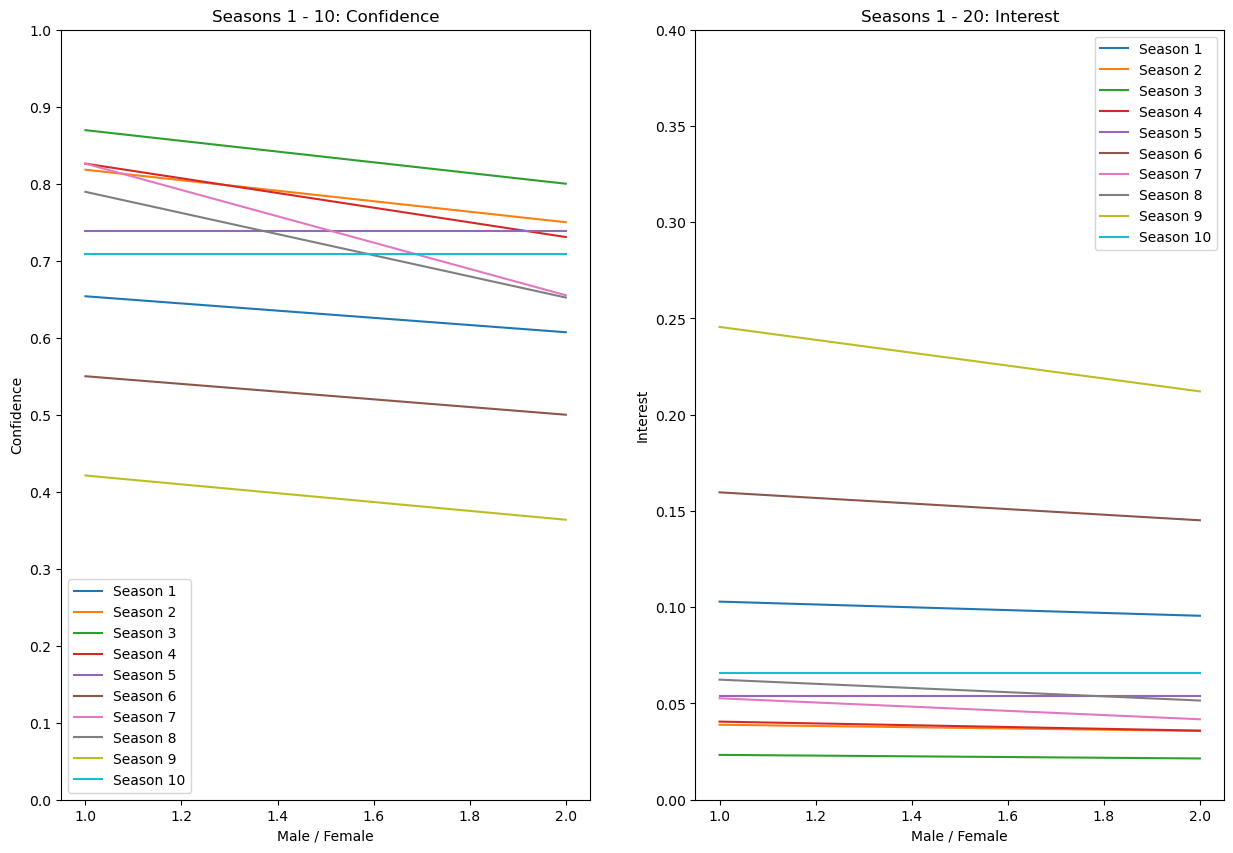

In [1046]:
x = [1, 2]
fig, ax= plt.subplots(1, 2, figsize= (15, 10))

ax[0].plot(x, rules_1[['confidence']].head(2), label= "Season 1")
ax[0].plot(x, rules_2[['confidence']].head(2), label= "Season 2")
ax[0].plot(x, rules_3[['confidence']].head(2), label= "Season 3")
ax[0].plot(x, rules_4[['confidence']].head(2), label= "Season 4")
ax[0].plot(x, rules_5[['confidence']].head(2), label= "Season 5")
ax[0].plot(x, rules_6[['confidence']].head(2), label= "Season 6")
ax[0].plot(x, rules_7[['confidence']].head(2), label= "Season 7")
ax[0].plot(x, rules_8[['confidence']].head(2), label= "Season 8")
ax[0].plot(x, rules_9[['confidence']].head(2), label= "Season 9")
ax[0].plot(x, rules_10[['confidence']].head(2), label= "Season 10")
ax[0].set_xlabel('Male / Female')
ax[0].set_ylabel('Confidence')
ax[0].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax[0].set_title('Seasons 1 - 10: Confidence')
ax[0].legend()

ax[1].plot(x, s1_interest, label= "Season 1")
ax[1].plot(x, s2_interest, label= "Season 2")
ax[1].plot(x, s3_interest, label= "Season 3")
ax[1].plot(x, s4_interest, label= "Season 4")
ax[1].plot(x, s5_interest, label= "Season 5")
ax[1].plot(x, s6_interest, label= "Season 6")
ax[1].plot(x, s7_interest, label= "Season 7")
ax[1].plot(x, s8_interest, label= "Season 8")
ax[1].plot(x, s9_interest, label= "Season 9")
ax[1].plot(x, s10_interest, label= "Season 10")
ax[1].set_xlabel('Male / Female')
ax[1].set_ylabel('Interest')
ax[1].set_yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])
ax[1].set_title('Seasons 1 - 10: Interest')
ax[1].legend()

plt.title('Seasons 1 - 20: Interest')
plt.savefig('s1_10_gender.png')
plt.show()

The outlier season here is Season 9: Vanuatu. In which a solid women's alliance was formed and worked together. However, Chris manage to survive. He then mananged to convince said women's alliance to vote him the winner.

In [1047]:
S11 = TransactionEncoder()
S12 = TransactionEncoder()
S13 = TransactionEncoder()
S14 = TransactionEncoder()
S15 = TransactionEncoder()
S16 = TransactionEncoder()
S17 = TransactionEncoder()
S18 = TransactionEncoder()
S19 = TransactionEncoder()
S20 = TransactionEncoder()

In [1048]:
S11_ary = S11.fit(s11_gender).transform(s11_gender)
S11_df = pd.DataFrame(S11_ary, columns= S11.columns_)
S11_freq = apriori(S11_df, min_support= minimum_support, use_colnames=True)

S12_ary = S12.fit(s12_gender).transform(s12_gender)
S12_df = pd.DataFrame(S12_ary, columns= S12.columns_)
S12_freq = apriori(S12_df, min_support= minimum_support, use_colnames=True)

S13_ary = S13.fit(s13_gender).transform(s13_gender)
S13_df = pd.DataFrame(S13_ary, columns= S13.columns_)
S13_freq = apriori(S13_df, min_support= minimum_support, use_colnames=True)

S14_ary = S14.fit(s14_gender).transform(s14_gender)
S14_df = pd.DataFrame(S14_ary, columns= S14.columns_)
S14_freq = apriori(S14_df, min_support= minimum_support, use_colnames=True)

S15_ary = S15.fit(s15_gender).transform(s15_gender)
S15_df = pd.DataFrame(S15_ary, columns= S15.columns_)
S15_freq = apriori(S15_df, min_support= minimum_support, use_colnames=True)

S16_ary = S16.fit(s16_gender).transform(s16_gender)
S16_df = pd.DataFrame(S16_ary, columns= S16.columns_)
S16_freq = apriori(S16_df, min_support= minimum_support, use_colnames=True)

S17_ary = S17.fit(s17_gender).transform(s17_gender)
S17_df = pd.DataFrame(S17_ary, columns= S17.columns_)
S17_freq = apriori(S17_df, min_support= minimum_support, use_colnames=True)

S18_ary = S18.fit(s18_gender).transform(s18_gender)
S18_df = pd.DataFrame(S18_ary, columns= S18.columns_)
S18_freq = apriori(S18_df, min_support= minimum_support, use_colnames=True)

S19_ary = S19.fit(s19_gender).transform(s19_gender)
S19_df = pd.DataFrame(S19_ary, columns= S19.columns_)
S19_freq = apriori(S19_df, min_support= minimum_support, use_colnames=True)

S20_ary = S20.fit(s20_gender).transform(s20_gender)
S20_df = pd.DataFrame(S20_ary, columns= S20.columns_)
S20_freq = apriori(S20_df, min_support= minimum_support, use_colnames=True)

In [1049]:
rules_11 = association_rules(S11_freq, num_itemsets=len(S11_freq), metric="confidence", min_threshold= minimum_confidence)
rules_12 = association_rules(S12_freq, num_itemsets=len(S12_freq), metric="confidence", min_threshold= minimum_confidence)
rules_13 = association_rules(S13_freq, num_itemsets=len(S13_freq), metric="confidence", min_threshold= minimum_confidence)
rules_14 = association_rules(S14_freq, num_itemsets=len(S14_freq), metric="confidence", min_threshold= minimum_confidence)
rules_15 = association_rules(S15_freq, num_itemsets=len(S15_freq), metric="confidence", min_threshold= minimum_confidence)
rules_16 = association_rules(S16_freq, num_itemsets=len(S16_freq), metric="confidence", min_threshold= minimum_confidence)
rules_17 = association_rules(S17_freq, num_itemsets=len(S17_freq), metric="confidence", min_threshold= minimum_confidence)
rules_18 = association_rules(S18_freq, num_itemsets=len(S18_freq), metric="confidence", min_threshold= minimum_confidence)
rules_19 = association_rules(S19_freq, num_itemsets=len(S19_freq), metric="confidence", min_threshold= minimum_confidence)
rules_20 = association_rules(S20_freq, num_itemsets=len(S20_freq), metric="confidence", min_threshold= minimum_confidence)

rules_11.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_12.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_13.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_14.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_15.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_16.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_17.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_18.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_19.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_20.sort_values(['confidence', 'lift'], ascending=False, inplace=True)

In [1050]:
s11_interest = abs(rules_11['confidence'] - rules_11['consequent support']).head(5)
s12_interest = abs(rules_12['confidence'] - rules_12['consequent support']).head(5)
s13_interest = abs(rules_13['confidence'] - rules_13['consequent support']).head(5)
s14_interest = abs(rules_14['confidence'] - rules_14['consequent support']).head(5)
s15_interest = abs(rules_15['confidence'] - rules_15['consequent support']).head(5)
s16_interest = abs(rules_16['confidence'] - rules_16['consequent support']).head(5)
s17_interest = abs(rules_17['confidence'] - rules_17['consequent support']).head(5)
s18_interest = abs(rules_18['confidence'] - rules_18['consequent support']).head(5)
s19_interest = abs(rules_19['confidence'] - rules_19['consequent support']).head(5)
s20_interest = abs(rules_20['confidence'] - rules_20['consequent support']).head(5)

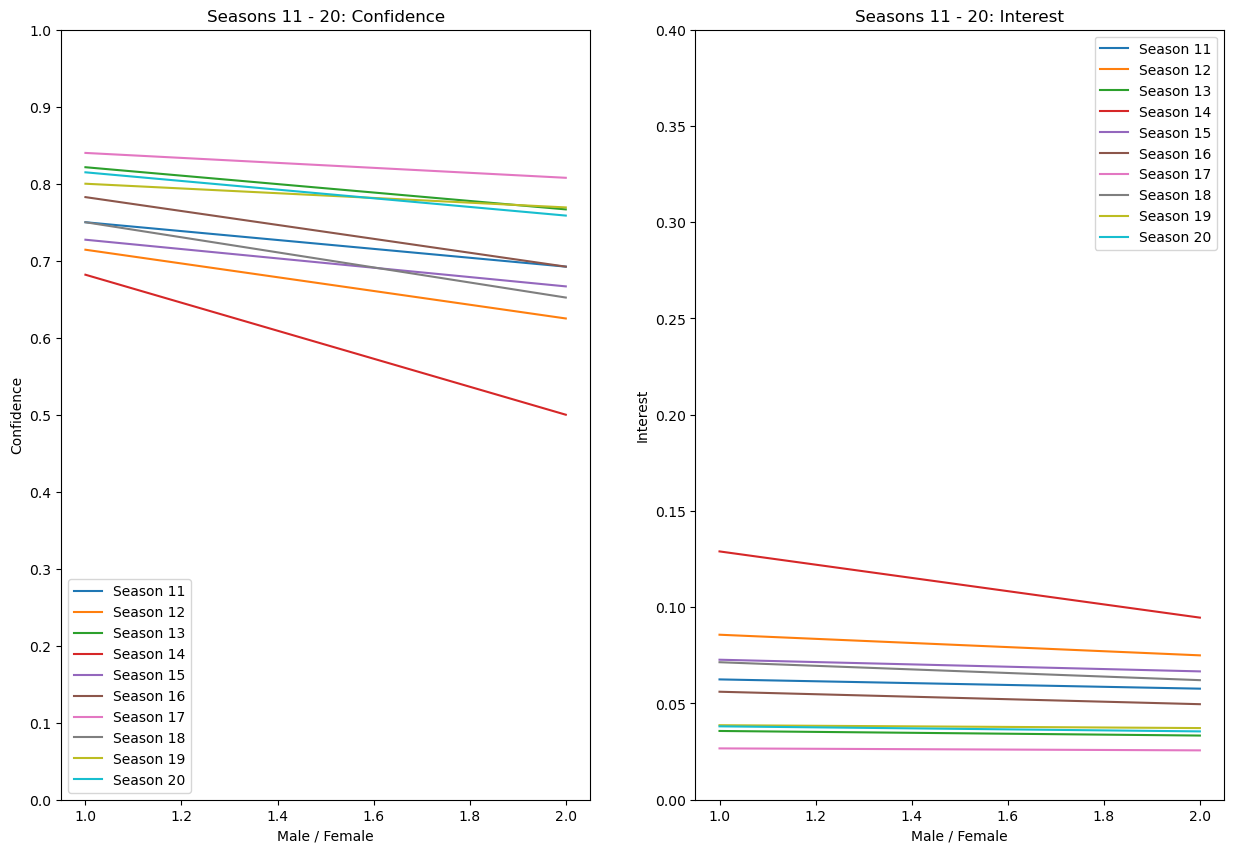

In [1051]:
fig, ax= plt.subplots(1, 2, figsize= (15, 10))

ax[0].plot(x, rules_11[['confidence']].head(2), label= "Season 11")
ax[0].plot(x, rules_12[['confidence']].head(2), label= "Season 12")
ax[0].plot(x, rules_13[['confidence']].head(2), label= "Season 13")
ax[0].plot(x, rules_14[['confidence']].head(2), label= "Season 14")
ax[0].plot(x, rules_15[['confidence']].head(2), label= "Season 15")
ax[0].plot(x, rules_16[['confidence']].head(2), label= "Season 16")
ax[0].plot(x, rules_17[['confidence']].head(2), label= "Season 17")
ax[0].plot(x, rules_18[['confidence']].head(2), label= "Season 18")
ax[0].plot(x, rules_19[['confidence']].head(2), label= "Season 19")
ax[0].plot(x, rules_20[['confidence']].head(2), label= "Season 20")
ax[0].set_xlabel('Male / Female')
ax[0].set_ylabel('Confidence')
ax[0].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax[0].set_title('Seasons 11 - 20: Confidence')
ax[0].legend()

ax[1].plot(x, s11_interest, label= "Season 11")
ax[1].plot(x, s12_interest, label= "Season 12")
ax[1].plot(x, s13_interest, label= "Season 13")
ax[1].plot(x, s14_interest, label= "Season 14")
ax[1].plot(x, s15_interest, label= "Season 15")
ax[1].plot(x, s16_interest, label= "Season 16")
ax[1].plot(x, s17_interest, label= "Season 17")
ax[1].plot(x, s18_interest, label= "Season 18")
ax[1].plot(x, s19_interest, label= "Season 19")
ax[1].plot(x, s20_interest, label= "Season 20")
ax[1].set_xlabel('Male / Female')
ax[1].set_ylabel('Interest')
ax[1].set_yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])
ax[1].set_title('Seasons 11 - 20: Interest')
ax[1].legend()
plt.title('Seasons 11 - 20: Interest')
plt.savefig('s11_20_gender.png')
plt.show()

In [1052]:
S21 = TransactionEncoder()
S22 = TransactionEncoder()
S23 = TransactionEncoder()
S24 = TransactionEncoder()
S25 = TransactionEncoder()
S26 = TransactionEncoder()
S27 = TransactionEncoder()
S28 = TransactionEncoder()
S29 = TransactionEncoder()
S30 = TransactionEncoder()

In [1053]:
S21_ary = S21.fit(s21_gender).transform(s21_gender)
S21_df = pd.DataFrame(S21_ary, columns= S21.columns_)
S21_freq = apriori(S21_df, min_support= minimum_support, use_colnames=True)

S22_ary = S22.fit(s22_gender).transform(s22_gender)
S22_df = pd.DataFrame(S22_ary, columns= S22.columns_)
S22_freq = apriori(S22_df, min_support= minimum_support, use_colnames=True)

S23_ary = S23.fit(s23_gender).transform(s23_gender)
S23_df = pd.DataFrame(S23_ary, columns= S23.columns_)
S23_freq = apriori(S23_df, min_support= minimum_support, use_colnames=True)

S24_ary = S24.fit(s24_gender).transform(s24_gender)
S24_df = pd.DataFrame(S24_ary, columns= S24.columns_)
S24_freq = apriori(S24_df, min_support= minimum_support, use_colnames=True)

S25_ary = S25.fit(s25_gender).transform(s25_gender)
S25_df = pd.DataFrame(S25_ary, columns= S25.columns_)
S25_freq = apriori(S25_df, min_support= minimum_support, use_colnames=True)

S26_ary = S26.fit(s26_gender).transform(s26_gender)
S26_df = pd.DataFrame(S26_ary, columns= S26.columns_)
S26_freq = apriori(S26_df, min_support= minimum_support, use_colnames=True)

S27_ary = S27.fit(s27_gender).transform(s27_gender)
S27_df = pd.DataFrame(S27_ary, columns= S27.columns_)
S27_freq = apriori(S27_df, min_support= minimum_support, use_colnames=True)

S28_ary = S28.fit(s28_gender).transform(s28_gender)
S28_df = pd.DataFrame(S28_ary, columns= S28.columns_)
S28_freq = apriori(S28_df, min_support= minimum_support, use_colnames=True)

S29_ary = S29.fit(s29_gender).transform(s29_gender)
S29_df = pd.DataFrame(S29_ary, columns= S29.columns_)
S29_freq = apriori(S29_df, min_support= minimum_support, use_colnames=True)

S30_ary = S30.fit(s30_gender).transform(s30_gender)
S30_df = pd.DataFrame(S30_ary, columns= S30.columns_)
S30_freq = apriori(S30_df, min_support= minimum_support, use_colnames=True)

In [1054]:
rules_21 = association_rules(S21_freq, num_itemsets=len(S21_freq), metric="confidence", min_threshold= minimum_confidence)
rules_22 = association_rules(S22_freq, num_itemsets=len(S22_freq), metric="confidence", min_threshold= minimum_confidence)
rules_23 = association_rules(S23_freq, num_itemsets=len(S23_freq), metric="confidence", min_threshold= minimum_confidence)
rules_24 = association_rules(S24_freq, num_itemsets=len(S24_freq), metric="confidence", min_threshold= minimum_confidence)
rules_25 = association_rules(S25_freq, num_itemsets=len(S25_freq), metric="confidence", min_threshold= minimum_confidence)
rules_26 = association_rules(S26_freq, num_itemsets=len(S26_freq), metric="confidence", min_threshold= minimum_confidence)
rules_27 = association_rules(S27_freq, num_itemsets=len(S27_freq), metric="confidence", min_threshold= minimum_confidence)
rules_28 = association_rules(S28_freq, num_itemsets=len(S28_freq), metric="confidence", min_threshold= minimum_confidence)
rules_29 = association_rules(S29_freq, num_itemsets=len(S29_freq), metric="confidence", min_threshold= minimum_confidence)
rules_30 = association_rules(S30_freq, num_itemsets=len(S30_freq), metric="confidence", min_threshold= minimum_confidence)

rules_21.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_22.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_23.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_24.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_25.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_26.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_27.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_28.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_29.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_30.sort_values(['confidence', 'lift'], ascending=False, inplace=True)

In [1055]:
s21_interest = abs(rules_21['confidence'] - rules_21['consequent support']).head(5)
s22_interest = abs(rules_22['confidence'] - rules_22['consequent support']).head(5)
s23_interest = abs(rules_23['confidence'] - rules_23['consequent support']).head(5)
s24_interest = abs(rules_24['confidence'] - rules_24['consequent support']).head(5)
s25_interest = abs(rules_25['confidence'] - rules_25['consequent support']).head(5)
s26_interest = abs(rules_26['confidence'] - rules_26['consequent support']).head(5)
s27_interest = abs(rules_27['confidence'] - rules_27['consequent support']).head(5)
s28_interest = abs(rules_28['confidence'] - rules_28['consequent support']).head(5)
s29_interest = abs(rules_29['confidence'] - rules_29['consequent support']).head(5)
s30_interest = abs(rules_30['confidence'] - rules_30['consequent support']).head(5)

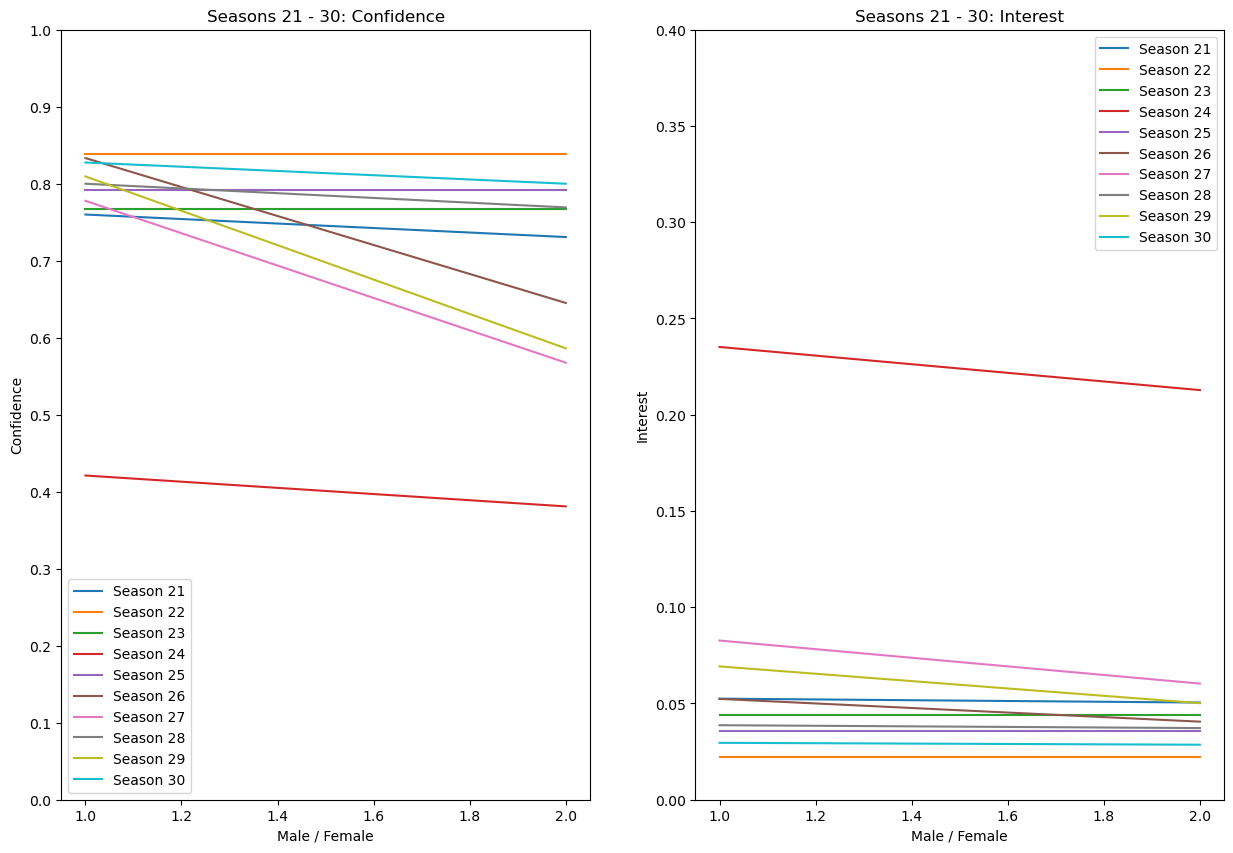

In [1056]:
fig, ax= plt.subplots(1, 2, figsize= (15, 10))

ax[0].plot(x, rules_21[['confidence']].head(2), label= "Season 21")
ax[0].plot(x, rules_22[['confidence']].head(2), label= "Season 22")
ax[0].plot(x, rules_23[['confidence']].head(2), label= "Season 23")
ax[0].plot(x, rules_24[['confidence']].head(2), label= "Season 24")
ax[0].plot(x, rules_25[['confidence']].head(2), label= "Season 25")
ax[0].plot(x, rules_26[['confidence']].head(2), label= "Season 26")
ax[0].plot(x, rules_27[['confidence']].head(2), label= "Season 27")
ax[0].plot(x, rules_28[['confidence']].head(2), label= "Season 28")
ax[0].plot(x, rules_29[['confidence']].head(2), label= "Season 29")
ax[0].plot(x, rules_30[['confidence']].head(2), label= "Season 30")
ax[0].set_xlabel('Male / Female')
ax[0].set_ylabel('Confidence')
ax[0].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax[0].set_title('Seasons 21 - 30: Confidence')
ax[0].legend()

ax[1].plot(x, s21_interest, label= "Season 21")
ax[1].plot(x, s22_interest, label= "Season 22")
ax[1].plot(x, s23_interest, label= "Season 23")
ax[1].plot(x, s24_interest, label= "Season 24")
ax[1].plot(x, s25_interest, label= "Season 25")
ax[1].plot(x, s26_interest, label= "Season 26")
ax[1].plot(x, s27_interest, label= "Season 27")
ax[1].plot(x, s28_interest, label= "Season 28")
ax[1].plot(x, s29_interest, label= "Season 29")
ax[1].plot(x, s30_interest, label= "Season 30")
ax[1].set_xlabel('Male / Female')
ax[1].set_ylabel('Interest')
ax[1].set_yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])
ax[1].set_title('Seasons 21 - 30: Interest')
ax[1].legend()
plt.title('Seasons 21 - 30: Interest')
plt.savefig('s21_30_gender.png')
plt.show()

Again, we have an outlier in Season 24: One World. This season was split up by gender, men versus women. Notably, Kim lead a women's alliance that ate the men.

In [1057]:
S31 = TransactionEncoder()
S32 = TransactionEncoder()
S33 = TransactionEncoder()
S34 = TransactionEncoder()
S35 = TransactionEncoder()
S36 = TransactionEncoder()
S37 = TransactionEncoder()
S38 = TransactionEncoder()
S39 = TransactionEncoder()
S40 = TransactionEncoder()

In [1058]:
S31_ary = S31.fit(s31_gender).transform(s31_gender)
S31_df = pd.DataFrame(S31_ary, columns= S31.columns_)
S31_freq = apriori(S31_df, min_support= minimum_support, use_colnames=True)

S32_ary = S32.fit(s32_gender).transform(s32_gender)
S32_df = pd.DataFrame(S32_ary, columns= S32.columns_)
S32_freq = apriori(S32_df, min_support= minimum_support, use_colnames=True)

S33_ary = S33.fit(s33_gender).transform(s33_gender)
S33_df = pd.DataFrame(S33_ary, columns= S33.columns_)
S33_freq = apriori(S33_df, min_support= minimum_support, use_colnames=True)

S34_ary = S34.fit(s34_gender).transform(s34_gender)
S34_df = pd.DataFrame(S34_ary, columns= S34.columns_)
S34_freq = apriori(S34_df, min_support= minimum_support, use_colnames=True)

S35_ary = S35.fit(s35_gender).transform(s35_gender)
S35_df = pd.DataFrame(S35_ary, columns= S35.columns_)
S35_freq = apriori(S35_df, min_support= minimum_support, use_colnames=True)

S36_ary = S36.fit(s36_gender).transform(s36_gender)
S36_df = pd.DataFrame(S36_ary, columns= S36.columns_)
S36_freq = apriori(S36_df, min_support= minimum_support, use_colnames=True)

S37_ary = S37.fit(s37_gender).transform(s37_gender)
S37_df = pd.DataFrame(S37_ary, columns= S37.columns_)
S37_freq = apriori(S37_df, min_support= minimum_support, use_colnames=True)

S38_ary = S38.fit(s38_gender).transform(s38_gender)
S38_df = pd.DataFrame(S38_ary, columns= S38.columns_)
S38_freq = apriori(S38_df, min_support= minimum_support, use_colnames=True)

S39_ary = S39.fit(s39_gender).transform(s39_gender)
S39_df = pd.DataFrame(S39_ary, columns= S39.columns_)
S39_freq = apriori(S39_df, min_support= minimum_support, use_colnames=True)

S40_ary = S40.fit(s40_gender).transform(s40_gender)
S40_df = pd.DataFrame(S40_ary, columns= S40.columns_)
S40_freq = apriori(S40_df, min_support= minimum_support, use_colnames=True)

In [1059]:
rules_31 = association_rules(S31_freq, num_itemsets=len(S31_freq), metric="confidence", min_threshold= minimum_confidence)
rules_32 = association_rules(S32_freq, num_itemsets=len(S32_freq), metric="confidence", min_threshold= minimum_confidence)
rules_33 = association_rules(S33_freq, num_itemsets=len(S33_freq), metric="confidence", min_threshold= minimum_confidence)
rules_34 = association_rules(S34_freq, num_itemsets=len(S34_freq), metric="confidence", min_threshold= minimum_confidence)
rules_35 = association_rules(S35_freq, num_itemsets=len(S35_freq), metric="confidence", min_threshold= minimum_confidence)
rules_36 = association_rules(S36_freq, num_itemsets=len(S36_freq), metric="confidence", min_threshold= minimum_confidence)
rules_37 = association_rules(S37_freq, num_itemsets=len(S37_freq), metric="confidence", min_threshold= minimum_confidence)
rules_38 = association_rules(S38_freq, num_itemsets=len(S38_freq), metric="confidence", min_threshold= minimum_confidence)
rules_39 = association_rules(S39_freq, num_itemsets=len(S39_freq), metric="confidence", min_threshold= minimum_confidence)
rules_40 = association_rules(S40_freq, num_itemsets=len(S40_freq), metric="confidence", min_threshold= minimum_confidence)

rules_31.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_32.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_33.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_34.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_35.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_36.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_37.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_38.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_39.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_40.sort_values(['confidence', 'lift'], ascending=False, inplace=True)

In [1060]:
s31_interest = abs(rules_31['confidence'] - rules_31['consequent support']).head(5)
s32_interest = abs(rules_32['confidence'] - rules_32['consequent support']).head(5)
s33_interest = abs(rules_33['confidence'] - rules_33['consequent support']).head(5)
s34_interest = abs(rules_34['confidence'] - rules_34['consequent support']).head(5)
s35_interest = abs(rules_35['confidence'] - rules_35['consequent support']).head(5)
s36_interest = abs(rules_36['confidence'] - rules_36['consequent support']).head(5)
s37_interest = abs(rules_37['confidence'] - rules_37['consequent support']).head(5)
s38_interest = abs(rules_38['confidence'] - rules_38['consequent support']).head(5)
s39_interest = abs(rules_39['confidence'] - rules_39['consequent support']).head(5)
s40_interest = abs(rules_40['confidence'] - rules_40['consequent support']).head(5)

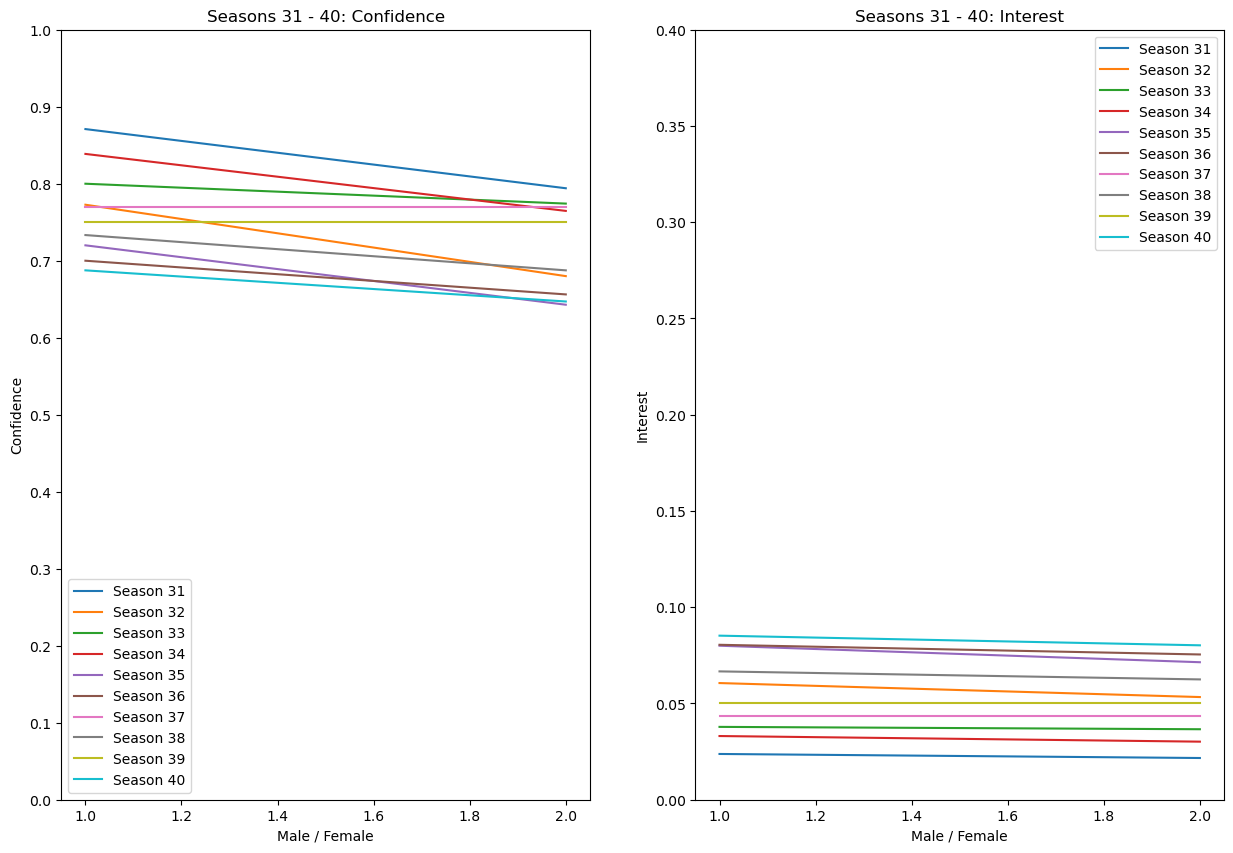

In [1061]:
fig, ax= plt.subplots(1, 2, figsize= (15, 10))

ax[0].plot(x, rules_31[['confidence']].head(2), label= "Season 31")
ax[0].plot(x, rules_32[['confidence']].head(2), label= "Season 32")
ax[0].plot(x, rules_33[['confidence']].head(2), label= "Season 33")
ax[0].plot(x, rules_34[['confidence']].head(2), label= "Season 34")
ax[0].plot(x, rules_35[['confidence']].head(2), label= "Season 35")
ax[0].plot(x, rules_36[['confidence']].head(2), label= "Season 36")
ax[0].plot(x, rules_37[['confidence']].head(2), label= "Season 37")
ax[0].plot(x, rules_38[['confidence']].head(2), label= "Season 38")
ax[0].plot(x, rules_39[['confidence']].head(2), label= "Season 39")
ax[0].plot(x, rules_40[['confidence']].head(2), label= "Season 40")
ax[0].set_xlabel('Male / Female')
ax[0].set_ylabel('Confidence')
ax[0].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax[0].set_title('Seasons 31 - 40: Confidence')
ax[0].legend()

ax[1].plot(x, s31_interest, label= "Season 31")
ax[1].plot(x, s32_interest, label= "Season 32")
ax[1].plot(x, s33_interest, label= "Season 33")
ax[1].plot(x, s34_interest, label= "Season 34")
ax[1].plot(x, s35_interest, label= "Season 35")
ax[1].plot(x, s36_interest, label= "Season 36")
ax[1].plot(x, s37_interest, label= "Season 37")
ax[1].plot(x, s38_interest, label= "Season 38")
ax[1].plot(x, s39_interest, label= "Season 39")
ax[1].plot(x, s40_interest, label= "Season 40")
ax[1].set_xlabel('Male / Female')
ax[1].set_ylabel('Interest')
ax[1].set_yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4])
ax[1].set_title('Seasons 31 - 40: Interest')
ax[1].legend()
plt.title('Seasons 31 - 40: Interest')
plt.savefig('s31_40_gender.png')
plt.show()

In [1068]:
max_interest = [
s1_interest.head(2).mean(), s2_interest.head(2).mean(), s3_interest.head(2).mean(), s4_interest.head(2).mean(), s5_interest.head(2).mean(),
s6_interest.head(2).mean(), s7_interest.head(2).mean(), s8_interest.head(2).mean(), s9_interest.head(2).mean(), s10_interest.head(2).mean(),

s11_interest.head(2).mean(), s12_interest.head(2).mean(), s13_interest.head(2).mean(), s14_interest.head(2).mean(), s15_interest.head(2).mean(),
s16_interest.head(2).mean(), s17_interest.head(2).mean(), s18_interest.head(2).mean(), s19_interest.head(2).mean(), s20_interest.head(2).mean(),

s21_interest.head(2).mean(), s22_interest.head(2).mean(), s23_interest.head(2).mean(), s24_interest.head(2).mean(), s25_interest.head(2).mean(),
s26_interest.head(2).mean(), s27_interest.head(2).mean(), s28_interest.head(2).mean(), s29_interest.head(2).mean(), s30_interest.head(2).mean(),

s31_interest.head(2).mean(), s32_interest.head(2).mean(), s33_interest.head(2).mean(), s34_interest.head(2).mean(), s35_interest.head(2).mean(),
s36_interest.head(2).mean(), s37_interest.head(2).mean(), s38_interest.head(2).mean(), s39_interest.head(2).mean(), s40_interest.head(2).mean()]

confidence_max = [rules_1['confidence'].head(2).mean(), rules_2['confidence'].head(2).mean(), rules_3['confidence'].head(2).mean(), 
rules_4['confidence'].head(2).mean(), rules_5['confidence'].head(2).mean(), rules_6['confidence'].head(2).mean(), 
rules_7['confidence'].head(2).mean(), rules_8['confidence'].head(2).mean(), rules_9['confidence'].head(2).mean(),

rules_10['confidence'].head(2).mean(), rules_11['confidence'].head(2).mean(), rules_12['confidence'].head(2).mean(),
rules_13['confidence'].head(2).mean(), rules_14['confidence'].head(2).mean(), rules_15['confidence'].head(2).mean(),
rules_16['confidence'].head(2).mean(), rules_17['confidence'].head(2).mean(), rules_18['confidence'].head(2).mean(),
rules_19['confidence'].head(2).mean(), rules_20['confidence'].head(2).mean(),
rules_21['confidence'].head(2).mean(),

rules_22['confidence'].head(2).mean(), rules_23['confidence'].head(2).mean(), rules_24['confidence'].head(2).mean(), 
rules_25['confidence'].head(2).mean(), rules_26['confidence'].head(2).mean(), rules_27['confidence'].head(2).mean(),
rules_28['confidence'].head(2).mean(), rules_29['confidence'].head(2).mean(), rules_30['confidence'].head(2).mean(),
 
rules_31['confidence'].head(2).mean(), rules_32['confidence'].head(2).mean(), rules_33['confidence'].head(2).mean(), 
rules_34['confidence'].head(2).mean(), rules_35['confidence'].head(2).mean(), rules_36['confidence'].head(2).mean(), 
rules_37['confidence'].head(2).mean(), rules_38['confidence'].head(2).mean(), rules_39['confidence'].head(2).mean(), 
rules_40['confidence'].head(2).mean()]

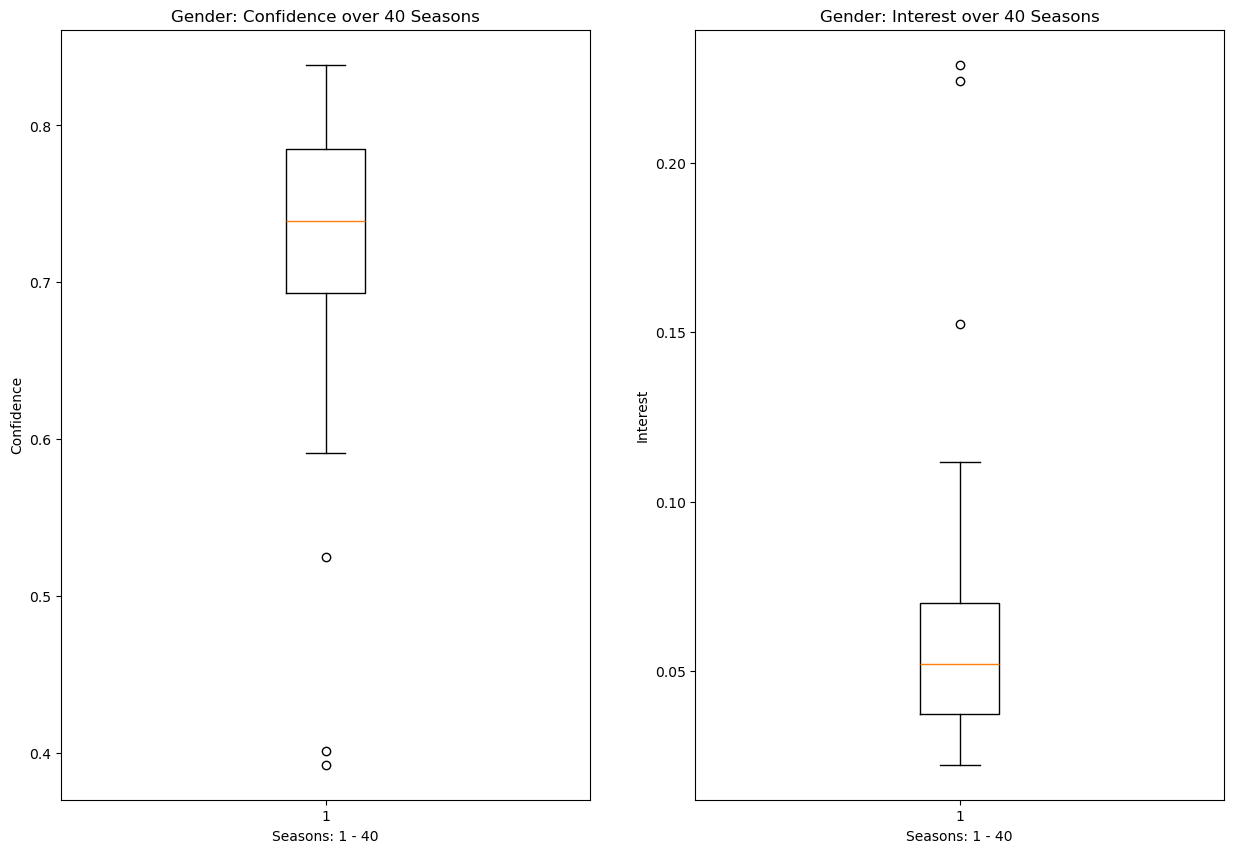

In [1069]:
x_40 = range(0, 40)

fig, ax= plt.subplots(1, 2, figsize= (15, 10))
ax[0].boxplot(np.array(confidence_max))
ax[0].set_title('Gender: Confidence over 40 Seasons')
ax[0].set_xlabel('Seasons: 1 - 40')
ax[0].set_ylabel('Confidence')

ax[1].boxplot(np.array(max_interest))
ax[1].set_title('Gender: Interest over 40 Seasons')
ax[1].set_xlabel('Seasons: 1 - 40')
ax[1].set_ylabel('Interest')

plt.savefig('s1_40_gender_confidence_interest.png')
plt.show()


In [1070]:
max_interest_37 = [
s1_interest.head(2).mean(), s2_interest.head(2).mean(), s3_interest.head(2).mean(), s4_interest.head(2).mean(), s5_interest.head(2).mean(),
s7_interest.head(2).mean(), s8_interest.head(2).mean(), s10_interest.head(2).mean(),

s11_interest.head(2).mean(), s12_interest.head(2).mean(), s13_interest.head(2).mean(), s14_interest.head(2).mean(), s15_interest.head(2).mean(),
s16_interest.head(2).mean(), s17_interest.head(2).mean(), s18_interest.head(2).mean(), s19_interest.head(2).mean(), s20_interest.head(2).mean(),

s21_interest.head(2).mean(), s22_interest.head(2).mean(), s23_interest.head(2).mean(), s25_interest.head(2).mean(),
s26_interest.head(2).mean(), s27_interest.head(2).mean(), s28_interest.head(2).mean(), s29_interest.head(2).mean(), s30_interest.head(2).mean(),

s31_interest.head(2).mean(), s32_interest.head(2).mean(), s33_interest.head(2).mean(), s34_interest.head(2).mean(), s35_interest.head(2).mean(),
s36_interest.head(2).mean(), s37_interest.head(2).mean(), s38_interest.head(2).mean(), s39_interest.head(2).mean(), s40_interest.head(2).mean()]

confidence_max_37 = [rules_1['confidence'].head(2).mean(), rules_2['confidence'].head(2).mean(), rules_3['confidence'].head(2).mean(), 
rules_4['confidence'].head(2).mean(), rules_5['confidence'].head(2).mean(), 
rules_7['confidence'].head(2).mean(), rules_8['confidence'].head(2).mean(), 
rules_10['confidence'].head(2).mean(), rules_11['confidence'].head(2).mean(), rules_12['confidence'].head(2).mean(),
rules_13['confidence'].head(2).mean(), rules_14['confidence'].head(2).mean(), rules_15['confidence'].head(2).mean(),
rules_16['confidence'].head(2).mean(), rules_17['confidence'].head(2).mean(), rules_18['confidence'].head(2).mean(),
rules_19['confidence'].head(2).mean(), rules_20['confidence'].head(2).mean(), rules_21['confidence'].head(2).mean(),
rules_22['confidence'].head(2).mean(), rules_23['confidence'].head(2).mean(), 
rules_25['confidence'].head(2).mean(), rules_26['confidence'].head(2).mean(), rules_27['confidence'].head(2).mean(),
rules_28['confidence'].head(2).mean(), rules_29['confidence'].head(2).mean(), rules_30['confidence'].head(2).mean(), 
rules_31['confidence'].head(2).mean(), rules_32['confidence'].head(2).mean(), rules_33['confidence'].head(2).mean(), 
rules_34['confidence'].head(2).mean(), rules_35['confidence'].head(2).mean(), rules_36['confidence'].head(2).mean(), 
rules_37['confidence'].head(2).mean(), rules_38['confidence'].head(2).mean(), rules_39['confidence'].head(2).mean(), 
rules_40['confidence'].head(2).mean()]

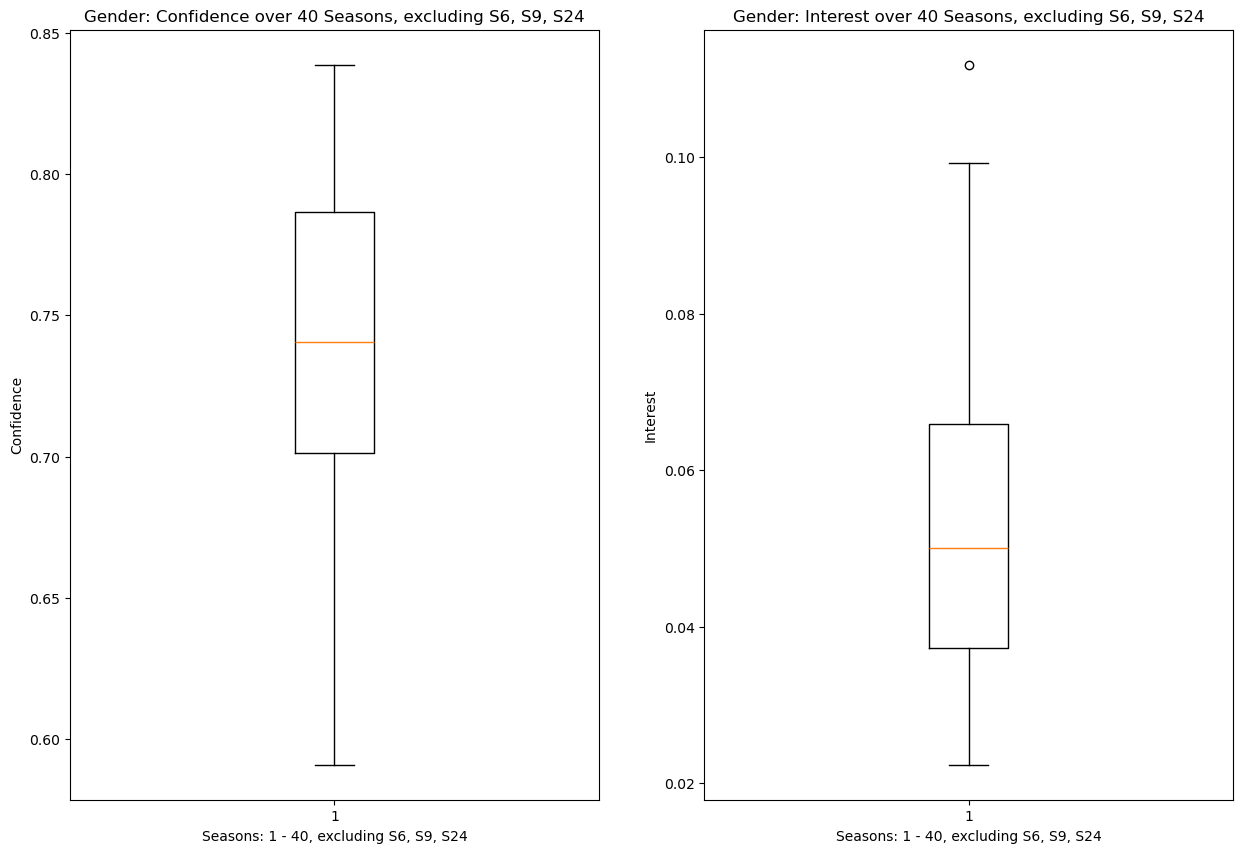

In [1071]:
x_40 = range(0, 37)

fig, ax= plt.subplots(1, 2, figsize= (15, 10))
ax[0].boxplot(np.array(confidence_max_37))
ax[0].set_title('Gender: Confidence over 40 Seasons, excluding S6, S9, S24')
ax[0].set_xlabel('Seasons: 1 - 40, excluding S6, S9, S24')
ax[0].set_ylabel('Confidence')

ax[1].boxplot(np.array(max_interest_37))
ax[1].set_title('Gender: Interest over 40 Seasons, excluding S6, S9, S24')
ax[1].set_xlabel('Seasons: 1 - 40, excluding S6, S9, S24')
ax[1].set_ylabel('Interest')

plt.savefig('s1_37_gender_confidence_interest.png')
plt.show()

In [1084]:
s14_interest.head(2).mean()

0.1117936117936118

Removed three seasons that where split by gender from the get go.

Outliers are determined by being greater than Q3 + 1.5(IQR) or less than Q1 - 1.5(IQR). The outlier is season 14, Survivor: Fiji.

Need to do a hypothesis test to see if confidence or interest is different between F-M and M-F: 

$H_{0}$: $(M-F)_i - (F-M)_i = 0$ and $H_{1}$: $(M-F)_i - (F-M)_i \neq 0$

Confidence p-value: 1.2846853023951136e-08

Interest p-value: 6.7445287845497995e-06

When the battle of sexes seasons are removed, we still get significant p-value(s).

In [ ]:
gender_confid_diff = [abs(rules_1['confidence'][0] - rules_1['confidence'][1]), abs(rules_2['confidence'][0] - rules_2['confidence'][1]),
                      abs(rules_3['confidence'][0] - rules_3['confidence'][1]), abs(rules_4['confidence'][0] - rules_4['confidence'][1]),
                      abs(rules_5['confidence'][0] - rules_5['confidence'][1]), abs(rules_6['confidence'][0] - rules_6['confidence'][1]),
                      abs(rules_7['confidence'][0] - rules_7['confidence'][1]), abs(rules_8['confidence'][0] - rules_8['confidence'][1]),
                      abs(rules_9['confidence'][0] - rules_9['confidence'][1]), abs(rules_10['confidence'][0] - rules_10['confidence'][1]),
                      abs(rules_11['confidence'][0] - rules_11['confidence'][1]), abs(rules_12['confidence'][0] - rules_12['confidence'][1]),
                      abs(rules_13['confidence'][0] - rules_13['confidence'][1]), abs(rules_14['confidence'][0] - rules_14['confidence'][1]),
                      abs(rules_15['confidence'][0] - rules_15['confidence'][1]), abs(rules_16['confidence'][0] - rules_16['confidence'][1]),
                      abs(rules_17['confidence'][0] - rules_17['confidence'][1]), abs(rules_18['confidence'][0] - rules_18['confidence'][1]),
                      abs(rules_19['confidence'][0] - rules_19['confidence'][1]), abs(rules_20['confidence'][0] - rules_20['confidence'][1]),
                      abs(rules_21['confidence'][0] - rules_21['confidence'][1]), abs(rules_22['confidence'][0] - rules_22['confidence'][1]),
                      abs(rules_23['confidence'][0] - rules_23['confidence'][1]), abs(rules_24['confidence'][0] - rules_24['confidence'][1]),
                      abs(rules_25['confidence'][0] - rules_25['confidence'][1]), abs(rules_26['confidence'][0] - rules_26['confidence'][1]),
                      abs(rules_27['confidence'][0] - rules_27['confidence'][1]), abs(rules_28['confidence'][0] - rules_28['confidence'][1]),
                      abs(rules_29['confidence'][0] - rules_29['confidence'][1]), abs(rules_30['confidence'][0] - rules_30['confidence'][1]),
                      abs(rules_31['confidence'][0] - rules_31['confidence'][1]), abs(rules_32['confidence'][0] - rules_32['confidence'][1]),
                      abs(rules_33['confidence'][0] - rules_33['confidence'][1]), abs(rules_34['confidence'][0] - rules_34['confidence'][1]),
                      abs(rules_35['confidence'][0] - rules_35['confidence'][1]), abs(rules_36['confidence'][0] - rules_36['confidence'][1]),
                      abs(rules_37['confidence'][0] - rules_37['confidence'][1]), abs(rules_38['confidence'][0] - rules_38['confidence'][1]),
                      abs(rules_39['confidence'][0] - rules_39['confidence'][1]), abs(rules_40['confidence'][0] - rules_40['confidence'][1])]

stats.ttest_1samp(a= gender_confid_diff, popmean= 0)

TtestResult(statistic=6.788983112500163, pvalue=6.21980324698576e-08, df=36)

In [ ]:
gender_interest_diff = [abs(s1_interest[0] - s1_interest[1]), abs(s2_interest[0] - s2_interest[1]), abs(s3_interest[0] - s3_interest[1]), 
                        abs(s4_interest[0] - s4_interest[1]), abs(s5_interest[0] - s5_interest[1]), abs(s6_interest[0] - s6_interest[1]), 
                        abs(s7_interest[0] - s7_interest[1]), abs(s8_interest[0] - s8_interest[1]), abs(s9_interest[0] - s9_interest[1]), 
                        abs(s10_interest[0] - s10_interest[1]), abs(s11_interest[0] - s11_interest[1]), abs(s12_interest[0] - s12_interest[1]), 
                        abs(s13_interest[0] - s13_interest[1]), abs(s14_interest[0] - s14_interest[1]), abs(s15_interest[0] - s15_interest[1]), 
                        abs(s16_interest[0] - s16_interest[1]), abs(s17_interest[0] - s17_interest[1]), abs(s18_interest[0] - s18_interest[1]), 
                        abs(s19_interest[0] - s19_interest[1]), abs(s20_interest[0] - s20_interest[1]), abs(s21_interest[0] - s21_interest[1]), 
                        abs(s22_interest[0] - s22_interest[1]), abs(s23_interest[0] - s23_interest[1]), abs(s24_interest[0] - s24_interest[1]), 
                        abs(s25_interest[0] - s25_interest[1]), abs(s26_interest[0] - s26_interest[1]), abs(s27_interest[0] - s27_interest[1]), 
                        abs(s28_interest[0] - s28_interest[1]), abs(s29_interest[0] - s29_interest[1]), abs(s30_interest[0] - s30_interest[1]), 
                        abs(s31_interest[0] - s31_interest[1]), abs(s32_interest[0] - s32_interest[1]), abs(s33_interest[0] - s33_interest[1]), 
                        abs(s34_interest[0] - s34_interest[1]), abs(s35_interest[0] - s35_interest[1]), abs(s36_interest[0] - s36_interest[1]), 
                        abs(s37_interest[0] - s37_interest[1]), abs(s38_interest[0] - s38_interest[1]), abs(s39_interest[0] - s39_interest[1]), 
                        abs(s40_interest[0] - s40_interest[1])]

stats.ttest_1samp(a= gender_interest_diff, popmean= 0)

TtestResult(statistic=4.892221957265492, pvalue=2.0875285662303256e-05, df=36)

The hypothesis test results in rejecting the null hypothesis (two sided t test) that the difference between M-F and F-M confidence is different, comfirmed. Can't think about what this means. Will come back to it later.

In [904]:
minimum_support = 0.1
minimum_confidence = 0.1

S1_ary = S1.fit(s1_place).transform(s1_place)
S1_df = pd.DataFrame(S1_ary, columns= S1.columns_)
S1_freq = apriori(S1_df, min_support= minimum_support, use_colnames=True)

S2_ary = S2.fit(s2_place).transform(s2_place)
S2_df = pd.DataFrame(S2_ary, columns= S2.columns_)
S2_freq = apriori(S2_df, min_support= minimum_support, use_colnames=True)

S3_ary = S3.fit(s3_place).transform(s3_place)
S3_df = pd.DataFrame(S3_ary, columns= S3.columns_)
S3_freq = apriori(S3_df, min_support= minimum_support, use_colnames=True)

S4_ary = S4.fit(s4_place).transform(s4_place)
S4_df = pd.DataFrame(S4_ary, columns= S4.columns_)
S4_freq = apriori(S4_df, min_support= minimum_support, use_colnames=True)

S5_ary = S5.fit(s5_place).transform(s5_place)
S5_df = pd.DataFrame(S5_ary, columns= S5.columns_)
S5_freq = apriori(S5_df, min_support= minimum_support, use_colnames=True)

S6_ary = S6.fit(s6_place).transform(s6_place)
S6_df = pd.DataFrame(S6_ary, columns= S6.columns_)
S6_freq = apriori(S6_df, min_support= minimum_support, use_colnames=True)

S7_ary = S7.fit(s7_place).transform(s7_place)
S7_df = pd.DataFrame(S7_ary, columns= S7.columns_)
S7_freq = apriori(S7_df, min_support= minimum_support, use_colnames=True)

S8_ary = S8.fit(s8_place).transform(s8_place)
S8_df = pd.DataFrame(S8_ary, columns= S8.columns_)
S8_freq = apriori(S8_df, min_support= minimum_support, use_colnames=True)

S9_ary = S9.fit(s9_place).transform(s9_place)
S9_df = pd.DataFrame(S9_ary, columns= S9.columns_)
S9_freq = apriori(S9_df, min_support= minimum_support, use_colnames=True)

S10_ary = S10.fit(s10_place).transform(s10_place)
S10_df = pd.DataFrame(S10_ary, columns= S10.columns_)
S10_freq = apriori(S10_df, min_support= minimum_support, use_colnames=True)


In [905]:
rules_1 = association_rules(S1_freq, num_itemsets=len(S1_freq), metric="confidence", min_threshold= minimum_confidence)
rules_2 = association_rules(S2_freq, num_itemsets=len(S2_freq), metric="confidence", min_threshold= minimum_confidence)
rules_3 = association_rules(S3_freq, num_itemsets=len(S3_freq), metric="confidence", min_threshold= minimum_confidence)
rules_4 = association_rules(S4_freq, num_itemsets=len(S4_freq), metric="confidence", min_threshold= minimum_confidence)
rules_5 = association_rules(S5_freq, num_itemsets=len(S5_freq), metric="confidence", min_threshold= minimum_confidence)
rules_6 = association_rules(S6_freq, num_itemsets=len(S6_freq), metric="confidence", min_threshold= minimum_confidence)
rules_7 = association_rules(S7_freq, num_itemsets=len(S7_freq), metric="confidence", min_threshold= minimum_confidence)
rules_8 = association_rules(S8_freq, num_itemsets=len(S8_freq), metric="confidence", min_threshold= minimum_confidence)
rules_9 = association_rules(S9_freq, num_itemsets=len(S9_freq), metric="confidence", min_threshold= minimum_confidence)
rules_10 = association_rules(S10_freq, num_itemsets=len(S10_freq), metric="confidence", min_threshold= minimum_confidence)

rules_1.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_2.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_3.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_4.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_5.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_6.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_7.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_8.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_9.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_10.sort_values(['confidence', 'lift'], ascending=False, inplace=True)


In [906]:
S11_ary = S11.fit(s11_place).transform(s11_place)
S11_df = pd.DataFrame(S11_ary, columns= S11.columns_)
S11_freq = apriori(S11_df, min_support= minimum_support, use_colnames=True)

S12_ary = S12.fit(s12_place).transform(s12_place)
S12_df = pd.DataFrame(S12_ary, columns= S12.columns_)
S12_freq = apriori(S12_df, min_support= minimum_support, use_colnames=True)

S13_ary = S13.fit(s13_place).transform(s13_place)
S13_df = pd.DataFrame(S13_ary, columns= S13.columns_)
S13_freq = apriori(S13_df, min_support= minimum_support, use_colnames=True)

S14_ary = S14.fit(s14_place).transform(s14_place)
S14_df = pd.DataFrame(S14_ary, columns= S14.columns_)
S14_freq = apriori(S14_df, min_support= minimum_support, use_colnames=True)

S15_ary = S15.fit(s15_place).transform(s15_place)
S15_df = pd.DataFrame(S15_ary, columns= S15.columns_)
S15_freq = apriori(S15_df, min_support= minimum_support, use_colnames=True)

S16_ary = S16.fit(s16_place).transform(s16_place)
S16_df = pd.DataFrame(S16_ary, columns= S16.columns_)
S16_freq = apriori(S16_df, min_support= minimum_support, use_colnames=True)

S17_ary = S17.fit(s17_place).transform(s17_place)
S17_df = pd.DataFrame(S17_ary, columns= S17.columns_)
S17_freq = apriori(S17_df, min_support= minimum_support, use_colnames=True)

S18_ary = S18.fit(s18_place).transform(s18_place)
S18_df = pd.DataFrame(S18_ary, columns= S18.columns_)
S18_freq = apriori(S18_df, min_support= minimum_support, use_colnames=True)

S19_ary = S19.fit(s19_place).transform(s19_place)
S19_df = pd.DataFrame(S19_ary, columns= S19.columns_)
S19_freq = apriori(S19_df, min_support= minimum_support, use_colnames=True)

S20_ary = S20.fit(s20_place).transform(s20_place)
S20_df = pd.DataFrame(S20_ary, columns= S20.columns_)
S20_freq = apriori(S20_df, min_support= minimum_support, use_colnames=True)


In [907]:
rules_11 = association_rules(S11_freq, num_itemsets=len(S11_freq), metric="confidence", min_threshold= minimum_confidence)
rules_12 = association_rules(S12_freq, num_itemsets=len(S12_freq), metric="confidence", min_threshold= minimum_confidence)
rules_13 = association_rules(S13_freq, num_itemsets=len(S13_freq), metric="confidence", min_threshold= minimum_confidence)
rules_14 = association_rules(S14_freq, num_itemsets=len(S14_freq), metric="confidence", min_threshold= minimum_confidence)
rules_15 = association_rules(S15_freq, num_itemsets=len(S15_freq), metric="confidence", min_threshold= minimum_confidence)
rules_16 = association_rules(S16_freq, num_itemsets=len(S16_freq), metric="confidence", min_threshold= minimum_confidence)
rules_17 = association_rules(S17_freq, num_itemsets=len(S17_freq), metric="confidence", min_threshold= minimum_confidence)
rules_18 = association_rules(S18_freq, num_itemsets=len(S18_freq), metric="confidence", min_threshold= minimum_confidence)
rules_19 = association_rules(S19_freq, num_itemsets=len(S19_freq), metric="confidence", min_threshold= minimum_confidence)
rules_20 = association_rules(S20_freq, num_itemsets=len(S20_freq), metric="confidence", min_threshold= minimum_confidence)

rules_11.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_12.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_13.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_14.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_15.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_16.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_17.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_18.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_19.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_20.sort_values(['confidence', 'lift'], ascending=False, inplace=True)


In [908]:
S21_ary = S21.fit(s21_place).transform(s21_place)
S21_df = pd.DataFrame(S21_ary, columns= S21.columns_)
S21_freq = apriori(S21_df, min_support= minimum_support, use_colnames=True)

S22_ary = S22.fit(s22_place).transform(s22_place)
S22_df = pd.DataFrame(S22_ary, columns= S22.columns_)
S22_freq = apriori(S22_df, min_support= minimum_support, use_colnames=True)

S23_ary = S23.fit(s23_place).transform(s23_place)
S23_df = pd.DataFrame(S23_ary, columns= S23.columns_)
S23_freq = apriori(S23_df, min_support= minimum_support, use_colnames=True)

S24_ary = S24.fit(s24_place).transform(s24_place)
S24_df = pd.DataFrame(S24_ary, columns= S24.columns_)
S24_freq = apriori(S24_df, min_support= minimum_support, use_colnames=True)

S25_ary = S25.fit(s25_place).transform(s25_place)
S25_df = pd.DataFrame(S25_ary, columns= S25.columns_)
S25_freq = apriori(S25_df, min_support= minimum_support, use_colnames=True)

S26_ary = S26.fit(s26_place).transform(s26_place)
S26_df = pd.DataFrame(S26_ary, columns= S26.columns_)
S26_freq = apriori(S26_df, min_support= minimum_support, use_colnames=True)

S27_ary = S27.fit(s27_place).transform(s27_place)
S27_df = pd.DataFrame(S27_ary, columns= S27.columns_)
S27_freq = apriori(S27_df, min_support= minimum_support, use_colnames=True)

S28_ary = S28.fit(s28_place).transform(s28_place)
S28_df = pd.DataFrame(S28_ary, columns= S28.columns_)
S28_freq = apriori(S28_df, min_support= minimum_support, use_colnames=True)

S29_ary = S29.fit(s29_place).transform(s29_place)
S29_df = pd.DataFrame(S29_ary, columns= S29.columns_)
S29_freq = apriori(S29_df, min_support= minimum_support, use_colnames=True)

S30_ary = S30.fit(s30_place).transform(s30_place)
S30_df = pd.DataFrame(S30_ary, columns= S30.columns_)
S30_freq = apriori(S30_df, min_support= minimum_support, use_colnames=True)


In [909]:
rules_21 = association_rules(S21_freq, num_itemsets=len(S21_freq), metric="confidence", min_threshold= minimum_confidence)
rules_22 = association_rules(S22_freq, num_itemsets=len(S22_freq), metric="confidence", min_threshold= minimum_confidence)
rules_23 = association_rules(S23_freq, num_itemsets=len(S23_freq), metric="confidence", min_threshold= minimum_confidence)
rules_24 = association_rules(S24_freq, num_itemsets=len(S24_freq), metric="confidence", min_threshold= minimum_confidence)
rules_25 = association_rules(S25_freq, num_itemsets=len(S25_freq), metric="confidence", min_threshold= minimum_confidence)
rules_26 = association_rules(S26_freq, num_itemsets=len(S26_freq), metric="confidence", min_threshold= minimum_confidence)
rules_27 = association_rules(S27_freq, num_itemsets=len(S27_freq), metric="confidence", min_threshold= minimum_confidence)
rules_28 = association_rules(S28_freq, num_itemsets=len(S28_freq), metric="confidence", min_threshold= minimum_confidence)
rules_29 = association_rules(S29_freq, num_itemsets=len(S29_freq), metric="confidence", min_threshold= minimum_confidence)
rules_30 = association_rules(S30_freq, num_itemsets=len(S30_freq), metric="confidence", min_threshold= minimum_confidence)

rules_21.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_22.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_23.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_24.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_25.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_26.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_27.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_28.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_29.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_30.sort_values(['confidence', 'lift'], ascending=False, inplace=True)


In [910]:
S31_ary = S31.fit(s31_place).transform(s31_place)
S31_df = pd.DataFrame(S31_ary, columns= S31.columns_)
S31_freq = apriori(S31_df, min_support= minimum_support, use_colnames=True)

S32_ary = S32.fit(s32_place).transform(s32_place)
S32_df = pd.DataFrame(S32_ary, columns= S32.columns_)
S32_freq = apriori(S32_df, min_support= minimum_support, use_colnames=True)

S33_ary = S33.fit(s33_place).transform(s33_place)
S33_df = pd.DataFrame(S33_ary, columns= S33.columns_)
S33_freq = apriori(S33_df, min_support= minimum_support, use_colnames=True)

S34_ary = S34.fit(s34_place).transform(s34_place)
S34_df = pd.DataFrame(S34_ary, columns= S34.columns_)
S34_freq = apriori(S34_df, min_support= minimum_support, use_colnames=True)

S35_ary = S35.fit(s35_place).transform(s35_place)
S35_df = pd.DataFrame(S35_ary, columns= S35.columns_)
S35_freq = apriori(S35_df, min_support= minimum_support, use_colnames=True)

S36_ary = S36.fit(s36_place).transform(s36_place)
S36_df = pd.DataFrame(S36_ary, columns= S36.columns_)
S36_freq = apriori(S36_df, min_support= minimum_support, use_colnames=True)

S37_ary = S37.fit(s37_place).transform(s37_place)
S37_df = pd.DataFrame(S37_ary, columns= S37.columns_)
S37_freq = apriori(S37_df, min_support= minimum_support, use_colnames=True)

S38_ary = S38.fit(s38_place).transform(s38_place)
S38_df = pd.DataFrame(S38_ary, columns= S38.columns_)
S38_freq = apriori(S38_df, min_support= minimum_support, use_colnames=True)

S39_ary = S39.fit(s39_place).transform(s39_place)
S39_df = pd.DataFrame(S39_ary, columns= S39.columns_)
S39_freq = apriori(S39_df, min_support= minimum_support, use_colnames=True)

S40_ary = S40.fit(s40_place).transform(s40_place)
S40_df = pd.DataFrame(S40_ary, columns= S40.columns_)
S40_freq = apriori(S40_df, min_support= minimum_support, use_colnames=True)


In [926]:
rules_31 = association_rules(S31_freq, num_itemsets=len(S31_freq), metric="confidence", min_threshold= minimum_confidence)
rules_32 = association_rules(S32_freq, num_itemsets=len(S32_freq), metric="confidence", min_threshold= minimum_confidence)
rules_33 = association_rules(S33_freq, num_itemsets=len(S33_freq), metric="confidence", min_threshold= minimum_confidence)
rules_34 = association_rules(S34_freq, num_itemsets=len(S34_freq), metric="confidence", min_threshold= minimum_confidence)
rules_35 = association_rules(S35_freq, num_itemsets=len(S35_freq), metric="confidence", min_threshold= minimum_confidence)
rules_36 = association_rules(S36_freq, num_itemsets=len(S36_freq), metric="confidence", min_threshold= minimum_confidence)
rules_37 = association_rules(S37_freq, num_itemsets=len(S37_freq), metric="confidence", min_threshold= minimum_confidence)
rules_38 = association_rules(S38_freq, num_itemsets=len(S38_freq), metric="confidence", min_threshold= minimum_confidence)
rules_39 = association_rules(S39_freq, num_itemsets=len(S39_freq), metric="confidence", min_threshold= minimum_confidence)
rules_40 = association_rules(S40_freq, num_itemsets=len(S40_freq), metric="confidence", min_threshold= minimum_confidence)

rules_31.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_32.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_33.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_34.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_35.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_36.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_37.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_38.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_39.sort_values(['confidence', 'lift'], ascending=False, inplace=True)
rules_40.sort_values(['confidence', 'lift'], ascending=False, inplace=True)


In [ ]:
rules_1.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
235,"(""7"", ""10"")","(""6"", ""9"")",0.103448,0.137931,0.103448,1.0,7.25,1.0,0.08918,inf,0.961538,0.75,1.0,0.875
237,"(""6"", ""10"")","(""7"", ""9"")",0.103448,0.137931,0.103448,1.0,7.25,1.0,0.08918,inf,0.961538,0.75,1.0,0.875
248,"(""6"", ""10"")","(""8"", ""9"")",0.103448,0.137931,0.103448,1.0,7.25,1.0,0.08918,inf,0.961538,0.75,1.0,0.875
251,"(""10"", ""8"")","(""6"", ""9"")",0.103448,0.137931,0.103448,1.0,7.25,1.0,0.08918,inf,0.961538,0.75,1.0,0.875
262,"(""7"", ""10"")","(""8"", ""9"")",0.103448,0.137931,0.103448,1.0,7.25,1.0,0.08918,inf,0.961538,0.75,1.0,0.875


In [ ]:

place_data = [3, 5, 4, 5, 3, 4, 3, 2, 4, 3, 4, 3, 4,
              ]


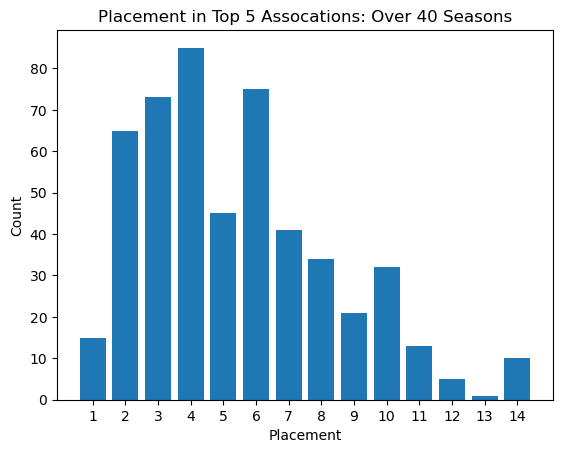

In [407]:
place_data_x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
place_data_count = [15, 65, 73, 85, 45, 75, 41, 34, 21, 32, 13, 5, 1, 10]

plt.bar(place_data_x, place_data_count)
plt.title('Placement in Top 5 Assocations: Over 40 Seasons')
plt.xlabel('Placement')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
plt.ylabel('Count')
plt.savefig('s1_40_placement_hist.png')

In [218]:
frames_1 = [s1_gender_count, s2_gender_count, s3_gender_count, s4_gender_count, s5_gender_count, s6_gender_count,
          s7_gender_count, s8_gender_count, s9_gender_count, s10_gender_count]
frames_2 = [s11_gender_count, s12_gender_count, s13_gender_count, s14_gender_count, s15_gender_count, s16_gender_count,
          s17_gender_count, s18_gender_count, s19_gender_count, s20_gender_count]
frames_3 = [s21_gender_count, s22_gender_count, s23_gender_count, s24_gender_count, s25_gender_count, s26_gender_count,
          s27_gender_count, s28_gender_count, s29_gender_count, s30_gender_count]
frames_4 = [s31_gender_count, s32_gender_count, s33_gender_count, s34_gender_count, s35_gender_count, s36_gender_count,
          s37_gender_count, s38_gender_count, s39_gender_count, s40_gender_count]
frame_5 = [s1_gender_count, s2_gender_count, s3_gender_count, s4_gender_count, s5_gender_count, s6_gender_count,
           s7_gender_count, s8_gender_count, s9_gender_count, s10_gender_count, s11_gender_count, s12_gender_count,
           s13_gender_count, s14_gender_count, s15_gender_count, s16_gender_count, s17_gender_count, s18_gender_count,
           s19_gender_count, s20_gender_count, s21_gender_count, s22_gender_count, s23_gender_count, s24_gender_count,
           s25_gender_count, s26_gender_count, s27_gender_count, s28_gender_count, s29_gender_count, s30_gender_count,
           s31_gender_count, s32_gender_count, s33_gender_count, s34_gender_count, s35_gender_count, s36_gender_count,
           s37_gender_count, s38_gender_count, s39_gender_count, s40_gender_count]
s1_10_gender_count = pd.concat(frames_1)
s11_20_gender_count = pd.concat(frames_2)
s21_30_gender_count = pd.concat(frames_3)
s31_40_gender_count = pd.concat(frames_4)
s1_40_gender_count = pd.concat(frame_5)
